### <font color=#20a0ff> <b>About the Dataset</b><font>

    
The dataset consists of customer data, including demographic information, financial history, and payment behavior, which are important factors in determining credit scores.   
The target feature is the **Credit_Score**, which classifies customers into three categories based on their financial history:    
1. **Good**: Low-risk customers with strong financial management.
2. **Standard**: Average-risk customers with moderate financial reliability.
3. **Poor**: High-risk customers who may struggle with debt repayments.


- **Dataset:** Credit Score Classification Dataset
- **Content:** Customer demographic, financial, and credit history details.
- **Number of Rows:** 100.000
- **Number of Columns:** 28

| **No** | **INPUTS**                  | **Description**                                                                                  |
|-------|-----------------------------|--------------------------------------------------------------------------------------------------|
| 1     | **ID**                       | Unique identifier for each record.                                                               |
| 2     | **Customer_ID**              | Unique identifier for each customer.                                                             |
| 3     | **Month**                    | Month of the transaction or record.                                                              |
| 4     | **Name**                     | Customer’s name.                                                                                 |
| 5     | **Age**                      | The customer’s age.                                                                              |
| 6     | **SSN**                      | Customer’s social security number.                                                               |
| 7     | **Occupation**               | The customer’s occupation.                                                                       |
| 8     | **Annual_Income**            | The customer’s annual income.                                                                    |
| 9     | **Monthly_Inhand_Salary**    | The customer’s monthly in-hand salary.                                                           |
| 10    | **Num_Bank_Accounts**        | Number of bank accounts owned by the customer.                                                   |
| 11    | **Num_Credit_Card**          | Number of credit cards owned by the customer.                                                    |
| 12    | **Interest_Rate**            | The interest rate applied to loans or credit.                                                    |
| 13    | **Num_of_Loan**              | Number of loans taken by the customer.                                                           |
| 14    | **Type_of_Loan**             | Type of loan taken by the customer.                                                              |
| 15    | **Delay_from_due_date**      | The delay in payment from the due date.                                                          |
| 16    | **Num_of_Delayed_Payment**   | Number of delayed payments made by the customer.                                                 |
| 17    | **Changed_Credit_Limit**     | Changes made to the customer’s credit limit.                                                     |
| 18    | **Num_Credit_Inquiries**     | Number of credit inquiries made.                                                                 |
| 19    | **Credit_Mix**               | The mix of credit types the customer uses (e.g., loans, credit cards).                           |
| 20    | **Outstanding_Debt**         | Total outstanding debt the customer has.                                                         |
| 21    | **Credit_Utilization_Ratio** | The ratio of credit used to the total credit limit.                                               |
| 22    | **Credit_History_Age**       | The length of the customer’s credit history.                                                     |
| 23    | **Payment_of_Min_Amount**    | Whether the customer pays the minimum amount required each month.                                |
| 24    | **Total_EMI_per_month**      | The total EMI (Equated Monthly Installment) the customer pays each month.                        |
| 25    | **Amount_invested_monthly**  | The amount invested by the customer each month.                                                  |
| 26    | **Payment_Behaviour**        | The payment behavior of the customer.                                                            |
| 27    | **Monthly_Balance**          | The customer’s remaining balance at the end of each month.                                        |
| 28    | **Credit_Score**             | The customer’s credit score (target variable: "Good," "Poor," "Standard").                        |

    
---    

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Setup and Initialization</p>

## Import the Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (12, 6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
import warnings

warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:

from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_validate

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, average_precision_score


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.saving import save_model
from keras.optimizers import Adam
from keras.regularizers import l2

## Load the Dataset

In [ ]:
train0 = pd.read_csv('train.csv')
train = train0.copy()

train.head(3)

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12               1824.843                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                   26.823  22 Years and 1 Months   
1            809.98                   31.945                    NaN   
2            809.98                   28.609  22 Years and 3 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No              49.575       80.41529543900253   
1                     No              49.575      118.28022162236736   
2                     No              49.575         81.699521264648   

                 Payment_Behaviour     Monthly_Balance Credit_Score  
0  High_spent_Small_value_payments  312.49408867943663         Good  
1   Low_spent_Large_value_payments  284.62916249607184         Good  
2  Low_spent_Medium_value_payments   331.2098628537912         Good  

[3 rows x 28 columns]

In [ ]:
test0 = pd.read_csv('test.csv')
test = test0.copy()

test.head(3)

ID Customer_ID      Month           Name Age          SSN Occupation  \
0  0x160a   CUS_0xd40  September  Aaron Maashoh  23  821-00-0265  Scientist   
1  0x160b   CUS_0xd40    October  Aaron Maashoh  24  821-00-0265  Scientist   
2  0x160c   CUS_0xd40   November  Aaron Maashoh  24  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      19114.12               1824.843                  3  ...   
1      19114.12               1824.843                  3  ...   
2      19114.12               1824.843                  3  ...   

   Num_Credit_Inquiries  Credit_Mix Outstanding_Debt Credit_Utilization_Ratio  \
0              2022.000        Good           809.98                   35.030   
1                 4.000        Good           809.98                   33.053   
2                 4.000        Good           809.98                   33.812   

       Credit_History_Age Payment_of_Min_Amount Total_EMI_per_month  \
0   22 Years and 9 Months                    No              49.575   
1  22 Years and 10 Months                    No              49.575   
2                     NaN                    No              49.575   

   Amount_invested_monthly                 Payment_Behaviour  \
0       236.64268203272135    Low_spent_Small_value_payments   
1       21.465380264657146  High_spent_Medium_value_payments   
2       148.23393788500925   Low_spent_Medium_value_payments   

      Monthly_Balance  
0  186.26670208571772  
1  361.44400385378196  
2  264.67544623342997  

[3 rows x 27 columns]

In [ ]:
# train + test data all together
df0 = pd.concat([train,test], sort=False).reset_index(drop=True)
df = df0.copy()

df.head(3)

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   

  Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  Credit_Mix  \
0      19114.12               1824.843                  3  ...           _   
1      19114.12                    NaN                  3  ...        Good   
2      19114.12                    NaN                  3  ...        Good   

   Outstanding_Debt Credit_Utilization_Ratio     Credit_History_Age  \
0            809.98                   26.823  22 Years and 1 Months   
1            809.98                   31.945                    NaN   
2            809.98                   28.609  22 Years and 3 Months   

   Payment_of_Min_Amount Total_EMI_per_month Amount_invested_monthly  \
0                     No              49.575       80.41529543900253   
1                     No              49.575      118.28022162236736   
2                     No              49.575         81.699521264648   

                 Payment_Behaviour     Monthly_Balance Credit_Score  
0  High_spent_Small_value_payments  312.49408867943663         Good  
1   Low_spent_Large_value_payments  284.62916249607184         Good  
2  Low_spent_Medium_value_payments   331.2098628537912         Good  

[3 rows x 28 columns]

In [ ]:
print('Train Data Shape:', train.shape)
print('Test Data Shape:', test.shape)

Train Data Shape: (100000, 28)
Test Data Shape: (50000, 27)


<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Exploratory Data Analysis (EDA)</p>

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

In [ ]:
# Display df.shape, duplicate and missing values count

print(f'Data shape (rows, columns): {df.shape}')
print(f'Number of total duplicate rows: {df.duplicated().sum()}')
print(f'Number of missing values in Train: {train.isnull().sum().sum()}')
print(f'Number of missing values in Test: {test.isnull().sum().sum()}')

Data shape (rows, columns): (150000, 28)
Number of total duplicate rows: 0
Number of missing values in Train: 60071
Number of missing values in Test: 30053


In [ ]:
# =============== User-Defined-Function ==========================

# Summary of Categorical Features
def object_summary(df):
    obs = df.shape[0]

    object_df = df.select_dtypes(include='object')
    summary_df = pd.DataFrame({
        'Dtype': object_df.dtypes,
        'Counts': object_df.apply(lambda x: x.count()),
        'Nulls': object_df.apply(lambda x: x.isnull().sum()),
        'NullPercent': (object_df.isnull().sum() / obs) * 100,
        'Top': object_df.apply(lambda x: x.mode()[0] if not x.mode().empty else '-'),
        'Frequency': object_df.apply(lambda x: x.value_counts().max() if not x.value_counts().empty else '-'),
        'Uniques': object_df.apply(lambda x: x.unique().shape[0]),
        'UniqueValues': object_df.apply(lambda x: list(x.unique()) if x.nunique() <= 20 else '-')
    })

    # Format 'NullPercent' to show percentages with two decimal points and a '%' sign
    summary_df['NullPercent'] = summary_df['NullPercent'].map("{:.2f}%".format)

    print('Categorical Features Summary:')
    print('___________________________\nData Types:')
    print(summary_df['Dtype'].value_counts())
    print('___________________________')


    return summary_df

object_summary(df)

Categorical Features Summary:
___________________________
Data Types:
Dtype
object    20
Name: count, dtype: int64
___________________________


Dtype  Counts  Nulls NullPercent  \
ID                       object  150000      0       0.00%   
Customer_ID              object  150000      0       0.00%   
Month                    object  150000      0       0.00%   
Name                     object  135000  15000      10.00%   
Age                      object  150000      0       0.00%   
SSN                      object  150000      0       0.00%   
Occupation               object  150000      0       0.00%   
Annual_Income            object  150000      0       0.00%   
Num_of_Loan              object  150000      0       0.00%   
Type_of_Loan             object  132888  17112      11.41%   
Num_of_Delayed_Payment   object  139500  10500       7.00%   
Changed_Credit_Limit     object  150000      0       0.00%   
Credit_Mix               object  150000      0       0.00%   
Outstanding_Debt         object  150000      0       0.00%   
Credit_History_Age       object  136500  13500       9.00%   
Payment_of_Min_Amount    object  150000      0       0.00%   
Amount_invested_monthly  object  143250   6750       4.50%   
Payment_Behaviour        object  150000      0       0.00%   
Monthly_Balance          object  148238   1762       1.17%   
Credit_Score             object  100000  50000      33.33%   

                                                      Top  Frequency  Uniques  \
ID                                                0x10000          1   150000   
Customer_ID                                    CUS_0x1000         12    12500   
Month                                               April      12500       12   
Name                                               Stevex         66    10140   
Age                                                    39       4198     2524   
SSN                                             #F%$D@*&8       8400    12501   
Occupation                                        _______      10500       16   
Annual_Income                                    36585.12         24    21192   
Num_of_Loan                                             3      21500      623   
Type_of_Loan                                Not Specified       2112     6261   
Num_of_Delayed_Payment                                 19       7949     1059   
Changed_Credit_Limit                                    _       3150     4605   
Credit_Mix                                       Standard      54858        4   
Outstanding_Debt                                  1360.45         36    13622   
Credit_History_Age                 17 Years and 11 Months        628      409   
Payment_of_Min_Amount                                 Yes      78484        3   
Amount_invested_monthly                         __10000__       6480   136498   
Payment_Behaviour          Low_spent_Small_value_payments      38207        7   
Monthly_Balance          __-333333333333333333333333333__         15   148225   
Credit_Score                                     Standard      53174        4   

                                                              UniqueValues  
ID                                                                       -  
Customer_ID                                                              -  
Month                    [January, February, March, April, May, June, J...  
Name                                                                     -  
Age                                                                      -  
SSN                                                                      -  
Occupation               [Scientist, _______, Teacher, Engineer, Entrep...  
Annual_Income                                                            -  
Num_of_Loan                                                              -  
Type_of_Loan                                                             -  
Num_of_Delayed_Payment                                                   -  
Changed_Credit_Limit                                                     -  
Credit_Mix          

In [ ]:


def numeric_summary(df):
    obs = df.shape[0]

    numeric_df = df.select_dtypes(include='number')
    summary_df = pd.DataFrame({
        'Dtype': numeric_df.dtypes,
        'Counts': numeric_df.apply(lambda x: x.count()),
        'Nulls': numeric_df.apply(lambda x: x.isnull().sum()),
        'NullPercent': (numeric_df.isnull().sum() / obs) * 100,
        'Min': numeric_df.min(),
        'Max': numeric_df.max(),
        'Uniques': numeric_df.apply(lambda x: x.unique().shape[0]),
        'UniqueValues': numeric_df.apply(lambda x: list(x.unique()) if x.nunique() <= 20 else '-')
    })

    summary_df['NullPercent'] = summary_df['NullPercent'].map("{:.2f}%".format)

    print('Numreical Features Summary:')
    print('___________________________\nData Types:')
    print(summary_df['Dtype'].value_counts())
    print('___________________________')

    return summary_df


numeric_summary(df)

Numreical Features Summary:
___________________________
Data Types:
Dtype
float64    4
int64      4
Name: count, dtype: int64
___________________________


Dtype  Counts  Nulls NullPercent     Min  \
Monthly_Inhand_Salary     float64  127500  22500      15.00% 303.645   
Num_Bank_Accounts           int64  150000      0       0.00%  -1.000   
Num_Credit_Card             int64  150000      0       0.00%   0.000   
Interest_Rate               int64  150000      0       0.00%   1.000   
Delay_from_due_date         int64  150000      0       0.00%  -5.000   
Num_Credit_Inquiries      float64  147000   3000       2.00%   0.000   
Credit_Utilization_Ratio  float64  150000      0       0.00%  20.000   
Total_EMI_per_month       float64  150000      0       0.00%   0.000   

                               Max  Uniques UniqueValues  
Monthly_Inhand_Salary    15204.633    13684            -  
Num_Bank_Accounts         1798.000     1183            -  
Num_Credit_Card           1499.000     1344            -  
Interest_Rate             5799.000     2394            -  
Delay_from_due_date         67.000       73            -  
Num_Credit_Inquiries      2597.000     1608            -  
Credit_Utilization_Ratio    50.000   150000            -  
Total_EMI_per_month      82398.000    16960            -

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;">Data Cleaning and Transformation</p>


In [ ]:
# =============== User-Defined-Function ==========================

#======= Get count and percentage of values for each column ======
def get_value_count(df, column_name):
    """
    This function calculates and returns a DataFrame with the value counts and
    their corresponding percentages for a specified column in the DataFrame.
    """

    vc = df[column_name].value_counts()
    vc_norm = df[column_name].value_counts(normalize=True)

    vc = vc.rename_axis(column_name).reset_index(name='counts')
    vc_norm = vc_norm.rename_axis(column_name).reset_index(name='percent')
    vc_norm['percent'] = (vc_norm['percent'] * 100).map('{:.2f}%'.format)

    df_result = pd.concat([vc[column_name], vc['counts'], vc_norm['percent']], axis=1)

    return df_result



# ========== User-Defined-Function for Missing Values ============
def missing_values(df):
    """This function calculates the missing values count and their percentage in a DataFrame."""

    missing_count = df.isnull().sum()
    value_count = df.isnull().count()
    missing_percentage = round(missing_count / value_count * 100, 2)

    # Format the percentage as '0.00%' with % symbol
    missing_percentage_formatted = missing_percentage.map("{:.2f}%".format)
    # Create a DataFrame to store the results
    missing_df = pd.DataFrame({"count": missing_count, "percentage": missing_percentage_formatted})

    return missing_df


# ============= Compare Missing Values (Train-Test ==============
def compare_missing_values(train, test):
    """
    Compares missing values between train and test datasets, returning counts, percentages, and data types.
    """
    def missing_data(df, label):
        missing_count = df.isna().sum()[df.isna().sum() > 0]
        total_count = len(df)
        missing_percentage = (missing_count / total_count * 100).map("{:.2f}%".format)
        return pd.DataFrame({
            f'{label} Missing Values': missing_count,
            f'{label} Missing Percentage': missing_percentage,
            f'{label} dtypes': df.dtypes[missing_count.index]
        })

    # Get missing data for train and test
    train_missing_df = missing_data(train, 'Train')
    test_missing_df = missing_data(test, 'Test')

    # Concatenate the missing values side by side
    return pd.concat([train_missing_df, test_missing_df], axis=1)


# ========== Plotting Missing Values  ===========================
def na_ratio_plot(df):
    """Plots the ratio of missing values for each feature and prints the count of missing values."""

    sns.displot(df.isna().melt(value_name='Missing_data',var_name='Features')\
                ,y='Features',hue='Missing_data',multiple='fill',aspect=9/8)

    print(df.isna().sum()[df.isna().sum()>0])



#========== Detecting Non-Numerical Characters ===========================

import re

def find_non_numeric_values(df, column_name):
    """
    Finds unique non-numeric values in a specified column of the DataFrame.
    """
    pattern = r'\D+'  # Pattern to match non-numeric characters
    # Find and flatten non-numeric values, then ensure uniqueness with set
    return set(re.findall(pattern, ' '.join(df[column_name].astype(str))))

#=================================================================

## Handling Missing Values and Cleaning Data

In [ ]:
# Comparing missing values in Train and Test data
compare_missing_values(train, test)

Train Missing Values Train Missing Percentage  \
Name                                     9985                    9.98%   
Monthly_Inhand_Salary                   15002                   15.00%   
Type_of_Loan                            11408                   11.41%   
Num_of_Delayed_Payment                   7002                    7.00%   
Num_Credit_Inquiries                     1965                    1.97%   
Credit_History_Age                       9030                    9.03%   
Amount_invested_monthly                  4479                    4.48%   
Monthly_Balance                          1200                    1.20%   

                        Train dtypes  Test Missing Values  \
Name                          object                 5015   
Monthly_Inhand_Salary        float64                 7498   
Type_of_Loan                  object                 5704   
Num_of_Delayed_Payment        object                 3498   
Num_Credit_Inquiries         float64                 1035   
Credit_History_Age            object                 4470   
Amount_invested_monthly       object                 2271   
Monthly_Balance               object                  562   

                        Test Missing Percentage Test dtypes  
Name                                     10.03%      object  
Monthly_Inhand_Salary                    15.00%     float64  
Type_of_Loan                             11.41%      object  
Num_of_Delayed_Payment                    7.00%      object  
Num_Credit_Inquiries                      2.07%     float64  
Credit_History_Age                        8.94%      object  
Amount_invested_monthly                   4.54%      object  
Monthly_Balance                           1.12%      object

<Axes: >

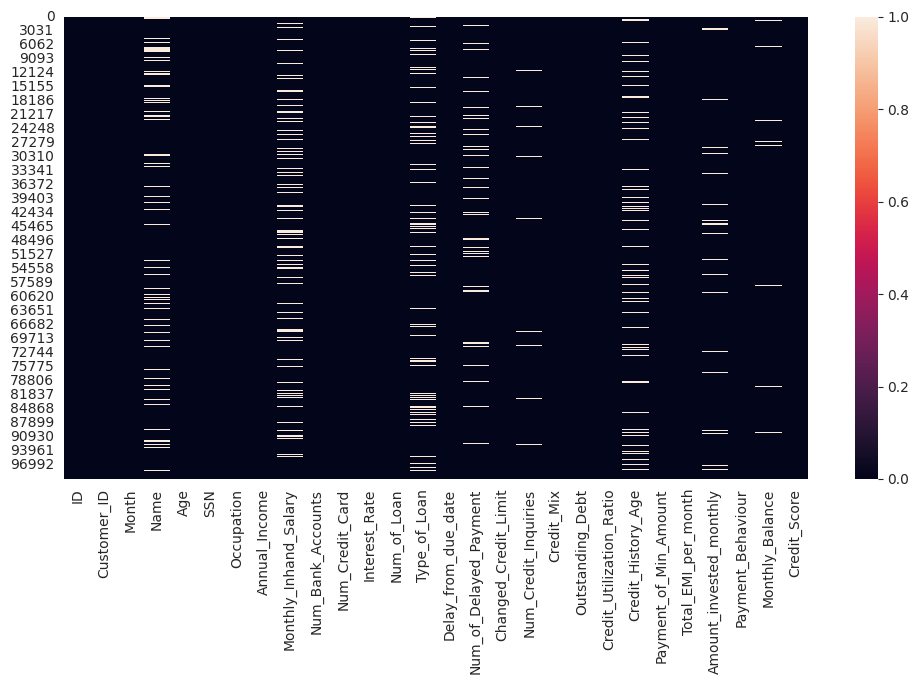

In [ ]:
# TRAIN DATASET
sns.heatmap(train.isnull())

<Axes: >

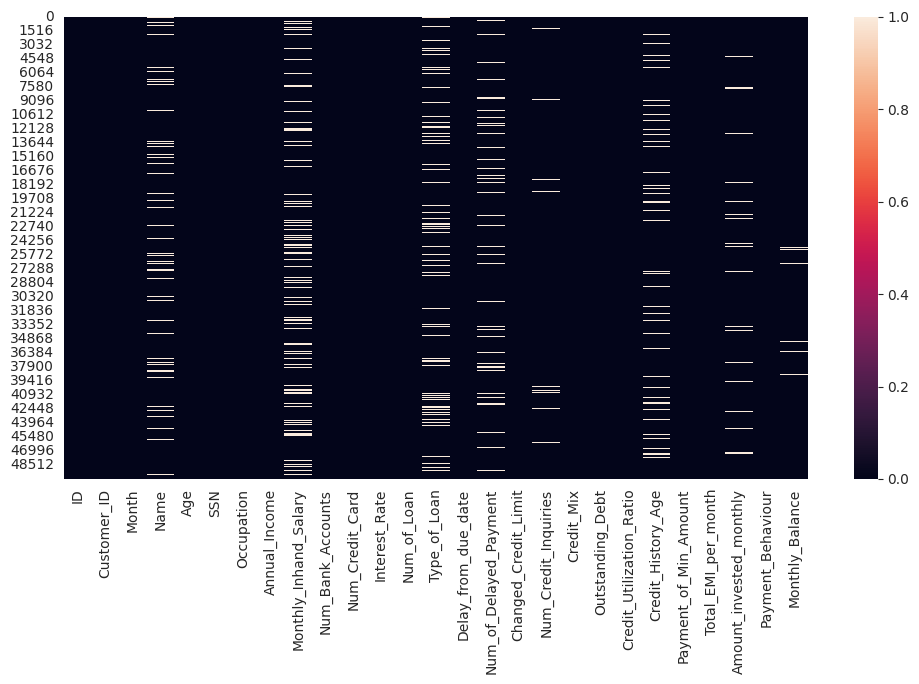

In [ ]:
# TEST DATASET
sns.heatmap(test.isnull())

## 'Name'

The **Name** column represents the full name of the customer. While it provides identification, it is typically not useful for analysis or modeling purposes and may be removed or anonymized to protect privacy during data preprocessing.


In [ ]:
# Name column unique values and percentage
get_value_count(df, 'Name')

Name  counts percent
0                Stevex      66   0.05%
1                Langep      65   0.05%
2              Jessicad      59   0.04%
3              Vaughanl      58   0.04%
4              Raymondr      58   0.04%
...                 ...     ...     ...
10134         Horowitzg       7   0.01%
10135              Evax       7   0.01%
10136           Paul Sv       7   0.01%
10137  Josephine Masonz       7   0.01%
10138          Timothyl       6   0.00%

[10139 rows x 3 columns]

In [ ]:
train[train['Name'].isnull()]

ID Customer_ID     Month Name Age          SSN     Occupation  \
7       0x1609   CUS_0xd40    August  NaN  23    #F%$D@*&8      Scientist   
17      0x161b  CUS_0x2dbc  February  NaN  34  486-85-3974       Engineer   
22      0x1620  CUS_0x2dbc      July  NaN  34  486-85-3974       Engineer   
64      0x1662  CUS_0x4157   January  NaN  23  070-19-1622         Doctor   
80      0x167a  CUS_0xa66b   January  NaN  40  221-30-8554        Teacher   
...        ...         ...       ...  ...  ..          ...            ...   
99964  0x25fba  CUS_0x372c       May  NaN  18  340-85-7301         Lawyer   
99965  0x25fbb  CUS_0x372c      June  NaN  19  340-85-7301         Lawyer   
99969  0x25fc3   CUS_0xf16  February  NaN  45  868-70-2218  Media_Manager   
99973  0x25fc7   CUS_0xf16      June  NaN  45  868-70-2218  Media_Manager   
99986  0x25fdc  CUS_0x8600     March  NaN  28  031-35-0942      Architect   

      Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
7          19114.12               1824.843                  3  ...   
17        143162.64              12187.220                  1  ...   
22        143162.64              12187.220                  1  ...   
64        114838.41               9843.868                  2  ...   
80         33751.27               2948.606                  5  ...   
...             ...                    ...                ...  ...   
99964      42903.79               3468.316                  0  ...   
99965      42903.79               3468.316                  0  ...   
99969      16680.35               1528.029                  1  ...   
99973      16680.35               1528.029                  1  ...   
99986      20002.88               1929.907                 10  ...   

       Credit_Mix  Outstanding_Debt Credit_Utilization_Ratio  \
7            Good            809.98                   23.934   
17           Good           1303.01                   41.703   
22           Good           1303.01                   38.069   
64           Good           1377.74                   33.665   
80       Standard           1328.93                   37.089   
...           ...               ...                      ...   
99964        Good           1079.48                   23.141   
99965        Good           1079.48                   35.549   
99969        Good            897.16                   34.086   
99973        Good            897.16                   24.973   
99986         Bad            3571.7                   24.714   

           Credit_History_Age  Payment_of_Min_Amount Total_EMI_per_month  \
7                         NaN                     No              49.575   
17     17 Years and 10 Months                     No             246.992   
22      18 Years and 3 Months                     No             246.992   
64      21 Years and 4 Months                     No             226.893   
80      19 Years and 2 Months                     NM              65.008   
...                       ...                    ...                 ...   
99964   28 Years and 5 Months                     No              34.975   
99965   28 Years and 6 Months                     No              34.975   
99969   21 Years and 2 Months                     No              41.114   
99973   21 Years and 6 Months                     No              41.114   
99986   5 Years and 10 Months                    Yes              60.965   

      Amount_invested_monthly                 Payment_Behaviour  \
7          24.785216509052056  High_spent_Medium_value_payments   
17         232.86038375993544   High_spent_Small_value_payments   
22         263.17416316163934   High_spent_Small_value_payments   
64         215.19351594560425   High_spent_Small_value_payments   
80         117.30669710658556  High_spent_Medium_value_payments   
...                       ...                               ...   
99964       450.6460933992599    Low_spent_Small_value_payments   
99965       187.355968611632

## 'Annual_Income'
The **Annual_Income** column represents the total income a customer earns in a year before any deductions, such as taxes or other withholdings. This value is a crucial indicator of the customer's overall financial stability and their ability to repay loans or manage other financial obligations.



In [ ]:
# column unique values and percentage
get_value_count(train, 'Annual_Income')

Annual_Income  counts percent
0          36585.12      16   0.02%
1          20867.67      16   0.02%
2          17273.83      16   0.02%
3          95596.35      15   0.01%
4          33029.66      15   0.01%
...             ...     ...     ...
18935     3917169.0       1   0.00%
18936     89394.78_       1   0.00%
18937     36806.84_       1   0.00%
18938     24363.78_       1   0.00%
18939     95685.21_       1   0.00%

[18940 rows x 3 columns]

In [ ]:
# Check missing values and dtype

print('Remaining missing values in Train:', train['Annual_Income'].isna().sum())
print('Remaining missing values in Test:', test['Annual_Income'].isna().sum())
print('dtype: ', train['Monthly_Inhand_Salary'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Annual_Income')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  float64


{' ', '.', '_', '_ '}

In [ ]:
# TRAIN
# Remove non-numeric characters from 'Annual_Income' column in train dataset
train['Annual_Income'] = train['Annual_Income'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

# Convert 'Annual_Income' to float in train dataset
train['Annual_Income'] = train['Annual_Income'].astype(float)

In [ ]:
# TEST
# Remove non-numeric characters from 'Annual_Income' column in test dataset
test['Annual_Income'] = test['Annual_Income'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

# Convert 'Annual_Income' to float in test dataset
test['Annual_Income'] = test['Annual_Income'].astype(float)

In [ ]:
train['Annual_Income'].describe()

count     100000.000
mean      176415.701
std      1429618.051
min         7005.930
25%        19457.500
50%        37578.610
75%        72790.920
max     24198062.000
Name: Annual_Income, dtype: float64

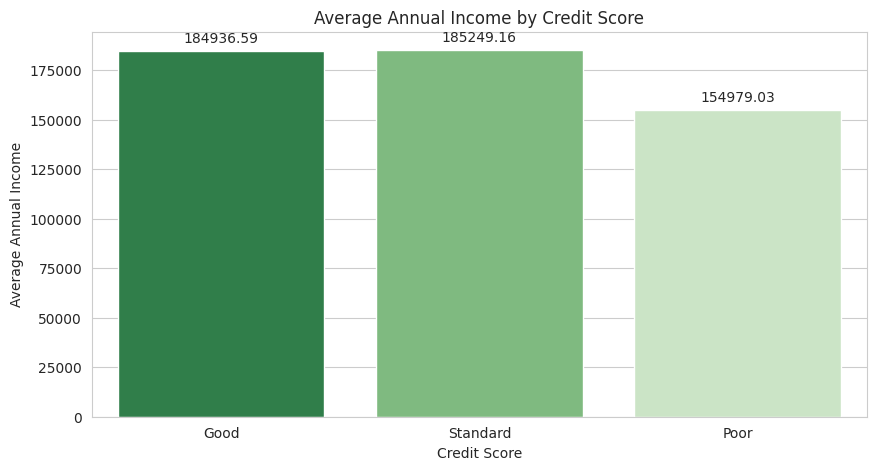

In [ ]:
# Plot Average Annual Income by Credit Score

plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Annual_Income', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches: ax.annotate(format(p.get_height(), '.2f'),
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    xytext=(0, 9), textcoords='offset points')

plt.title('Average Annual Income by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Annual Income')

plt.show()


This indicates that higher incomes are generally associated with better credit scores.

## 'Monthly_Inhand_Salary'

The **Monthly_Inhand_Salary** column represents the amount of salary a customer receives after deductions, such as taxes and other withholdings. This is the net salary the customer takes home on a monthly basis, and it can be a key indicator of the customer’s disposable income and financial capacity.


In [ ]:
# column unique values and percentage
get_value_count(train, 'Monthly_Inhand_Salary')

Monthly_Inhand_Salary  counts percent
0                   2295.058      15   0.02%
1                   6082.188      15   0.02%
2                   6358.957      15   0.02%
3                   6769.130      15   0.02%
4                   3080.555      14   0.02%
...                      ...     ...     ...
13230               3415.782       1   0.00%
13231               6272.739       1   0.00%
13232               1069.950       1   0.00%
13233                454.382       1   0.00%
13234               2319.831       1   0.00%

[13235 rows x 3 columns]

In [ ]:
# Check missing values and dtype

print('Remaining missing values in Train:', train['Monthly_Inhand_Salary'].isna().sum())
print('Remaining missing values in Test:', test['Monthly_Inhand_Salary'].isna().sum())
print('dtype: ', train['Monthly_Inhand_Salary'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Monthly_Inhand_Salary')

Remaining missing values in Train: 15002
Remaining missing values in Test: 7498
dtype:  float64


{' ',
 ' nan ',
 ' nan nan ',
 ' nan nan nan ',
 ' nan nan nan nan ',
 ' nan nan nan nan nan ',
 '.'}

In [ ]:
# numeric columns
numeric_columns = train.select_dtypes(include=[np.number])

# Calculate and sort the absolute correlation matrix
df_corr = numeric_columns.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()

# Filter the columns that are related to the 'Monthly_Balance' column
df_corr[df_corr['level_0'] == 'Monthly_Inhand_Salary'].head()

level_0                   level_1     0
1   Monthly_Inhand_Salary     Monthly_Inhand_Salary 1.000
10  Monthly_Inhand_Salary       Delay_from_due_date 0.250
11  Monthly_Inhand_Salary  Credit_Utilization_Ratio 0.173
15  Monthly_Inhand_Salary             Annual_Income 0.031
21  Monthly_Inhand_Salary         Num_Bank_Accounts 0.011

In [ ]:
# TRAIN DATA
# Filling missing values in Monthly_Inhand_Salary using Annual_Income for train dataset
train['Monthly_Inhand_Salary'].fillna(train['Annual_Income'] / 12, inplace=True)

# TEST DATA
# Filling missing values in Monthly_Inhand_Salary using Annual_Income for test dataset
test['Monthly_Inhand_Salary'].fillna(test['Annual_Income'] / 12, inplace=True)


# Check missing values
print('Remaining missing values in Train:', train['Monthly_Inhand_Salary'].isna().sum())
print('Remaining missing values in Test:', test['Monthly_Inhand_Salary'].isna().sum())

Remaining missing values in Train: 0
Remaining missing values in Test: 0


In [ ]:
train['Monthly_Inhand_Salary'].describe()

count    100000.000
mean       5743.259
std       45814.695
min         303.645
25%        1625.793
50%        3101.372
75%        5971.780
max     1990379.583
Name: Monthly_Inhand_Salary, dtype: float64

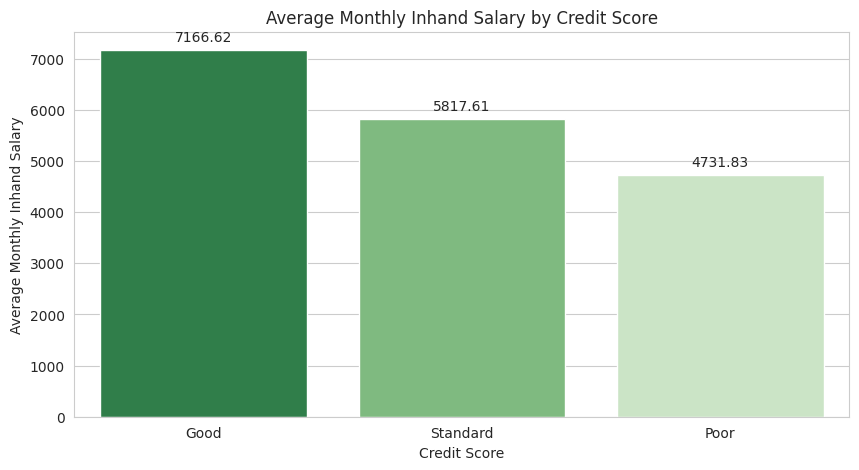

In [ ]:
# Plot Average Monthly Inhand Salary by Credit Score
plt.figure(figsize=(10, 5))
ax=sns.barplot(x='Credit_Score', y='Monthly_Inhand_Salary', data=train, ci=None, palette='Greens_r')

for p in ax.patches:  ax.annotate(format(p.get_height(), '.2f'),
                      (p.get_x() + p.get_width() / 2., p.get_height()),
                      ha='center', va='center',
                      xytext=(0, 9), textcoords='offset points')

plt.title('Average Monthly Inhand Salary by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Monthly Inhand Salary')

plt.show()


This indicates a positive correlation between higher in-hand salary and better credit scores.

## 'Type_of_Loan'

The **Type_of_Loan** column represents the specific type(s) of loan a customer has taken. It can include various loan categories, such as **Personal Loan**, **Auto Loan**, **Home Equity Loan**, etc. This information helps to categorize the different loan products a customer may have and can be used to understand their financial behavior or preferences.


In [ ]:
# Check column unique values and percentage
get_value_count(train, 'Type_of_Loan')

Type_of_Loan  counts percent
0                                         Not Specified    1408   1.59%
1                                   Credit-Builder Loan    1280   1.44%
2                                         Personal Loan    1272   1.44%
3                               Debt Consolidation Loan    1264   1.43%
4                                          Student Loan    1240   1.40%
...                                                 ...     ...     ...
6255  Debt Consolidation Loan, Personal Loan, Mortga...       8   0.01%
6256  Student Loan, Home Equity Loan, Student Loan, ...       8   0.01%
6257  Not Specified, Auto Loan, Auto Loan, and Debt ...       8   0.01%
6258  Credit-Builder Loan, Auto Loan, Mortgage Loan,...       8   0.01%
6259    Personal Loan, Not Specified, and Personal Loan       8   0.01%

[6260 rows x 3 columns]

In [ ]:
# Check missing values and dtype

print('Remaining missing values in Train:', train['Type_of_Loan'].isna().sum())
print('Remaining missing values in Test:', test['Type_of_Loan'].isna().sum())
print('dtype: ', train['Type_of_Loan'].dtypes)

Remaining missing values in Train: 11408
Remaining missing values in Test: 5704
dtype:  object


In [ ]:
# Unique values
# Split all the Unique Loan Types to see
unique_loan = df['Type_of_Loan'].dropna().str.split(',').explode().str.strip().unique()
# clean
unique_loan = [loan.replace('and ', '').strip() for loan in unique_loan]
unique_loan

['Auto Loan',
 'Credit-Builder Loan',
 'Personal Loan',
 'Home Equity Loan',
 'Not Specified',
 'Not Specified',
 'Mortgage Loan',
 'Student Loan',
 'Debt Consolidation Loan',
 'Auto Loan',
 'Payday Loan',
 'Payday Loan',
 'Student Loan',
 'Personal Loan',
 'Home Equity Loan',
 'Mortgage Loan',
 'Debt Consolidation Loan',
 'Credit-Builder Loan']

In [ ]:
# TRAIN DATA
# For each of the most common loan types (excluding the first one) in the train dataset
for i in train['Type_of_Loan'].value_counts().head(9).index[1:]:

    # Create a new column for each loan type in the train dataset
    # The new column will be 1 if the loan type is present in 'Type_of_Loan', 0 otherwise
    train[i] = train['Type_of_Loan'].str.contains(i, na=False).astype(int)

# Delete the original 'Type_of_Loan' column after creating binary columns in the train dataset
del train['Type_of_Loan']

# Display the first few rows of the modified train dataframe
train.head(3)

ID Customer_ID     Month           Name   Age          SSN Occupation  \
0  0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265  Scientist   
1  0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265  Scientist   
2  0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      19114.120               1824.843                  3  ...   
1      19114.120               1592.843                  3  ...   
2      19114.120               1592.843                  3  ...   

      Monthly_Balance  Credit_Score Credit-Builder Loan  Personal Loan  \
0  312.49408867943663          Good                   1              1   
1  284.62916249607184          Good                   1              1   
2   331.2098628537912          Good                   1              1   

  Debt Consolidation Loan Student Loan  Payday Loan Mortgage Loan Auto Loan  \
0                       0            0            0             0         1   
1                       0            0            0             0         1   
2                       0            0            0             0         1   

   Home Equity Loan  
0                 1  
1                 1  
2                 1  

[3 rows x 35 columns]

In [ ]:
# TEST DATA
# For each of the most common loan types (excluding the first one) in the test dataset
for i in test['Type_of_Loan'].value_counts().head(9).index[1:]:

    # Create a new column for each loan type in the test dataset
    # The new column will be 1 if the loan type is present in 'Type_of_Loan', 0 otherwise
    test[i] = test['Type_of_Loan'].str.contains(i, na=False).astype(int)

# Delete the original 'Type_of_Loan' column after creating binary columns in the test dataset
del test['Type_of_Loan']

# Display the first few rows of the modified test dataframe
test.head(3)

ID Customer_ID      Month           Name Age          SSN Occupation  \
0  0x160a   CUS_0xd40  September  Aaron Maashoh  23  821-00-0265  Scientist   
1  0x160b   CUS_0xd40    October  Aaron Maashoh  24  821-00-0265  Scientist   
2  0x160c   CUS_0xd40   November  Aaron Maashoh  24  821-00-0265  Scientist   

   Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \
0      19114.120               1824.843                  3  ...   
1      19114.120               1824.843                  3  ...   
2      19114.120               1824.843                  3  ...   

                  Payment_Behaviour     Monthly_Balance Credit-Builder Loan  \
0    Low_spent_Small_value_payments  186.26670208571772                   1   
1  High_spent_Medium_value_payments  361.44400385378196                   1   
2   Low_spent_Medium_value_payments  264.67544623342997                   1   

   Personal Loan Debt Consolidation Loan Student Loan  Payday Loan  \
0              1                       0            0            0   
1              1                       0            0            0   
2              1                       0            0            0   

  Mortgage Loan Auto Loan  Home Equity Loan  
0             0         1                 1  
1             0         1                 1  
2             0         1                 1  

[3 rows x 34 columns]

The following columns have been created from the **Type_of_Loan** column:

- `Credit-Builder Loan`,
- `Personal Loan`,
- `Debt Consolidation Loan`,
- `Student Loan`,
- `Payday Loan`,
- `Mortgage Loan`,
- `Auto Loan`,
- `Home Equity Loan`

In [ ]:
# List of loan-related columns
loan_columns = ['Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
                'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan']

# Check for missing values in each of the loan-related columns
train[loan_columns].isna().sum()

Credit-Builder Loan        0
Personal Loan              0
Debt Consolidation Loan    0
Student Loan               0
Payday Loan                0
Mortgage Loan              0
Auto Loan                  0
Home Equity Loan           0
dtype: int64

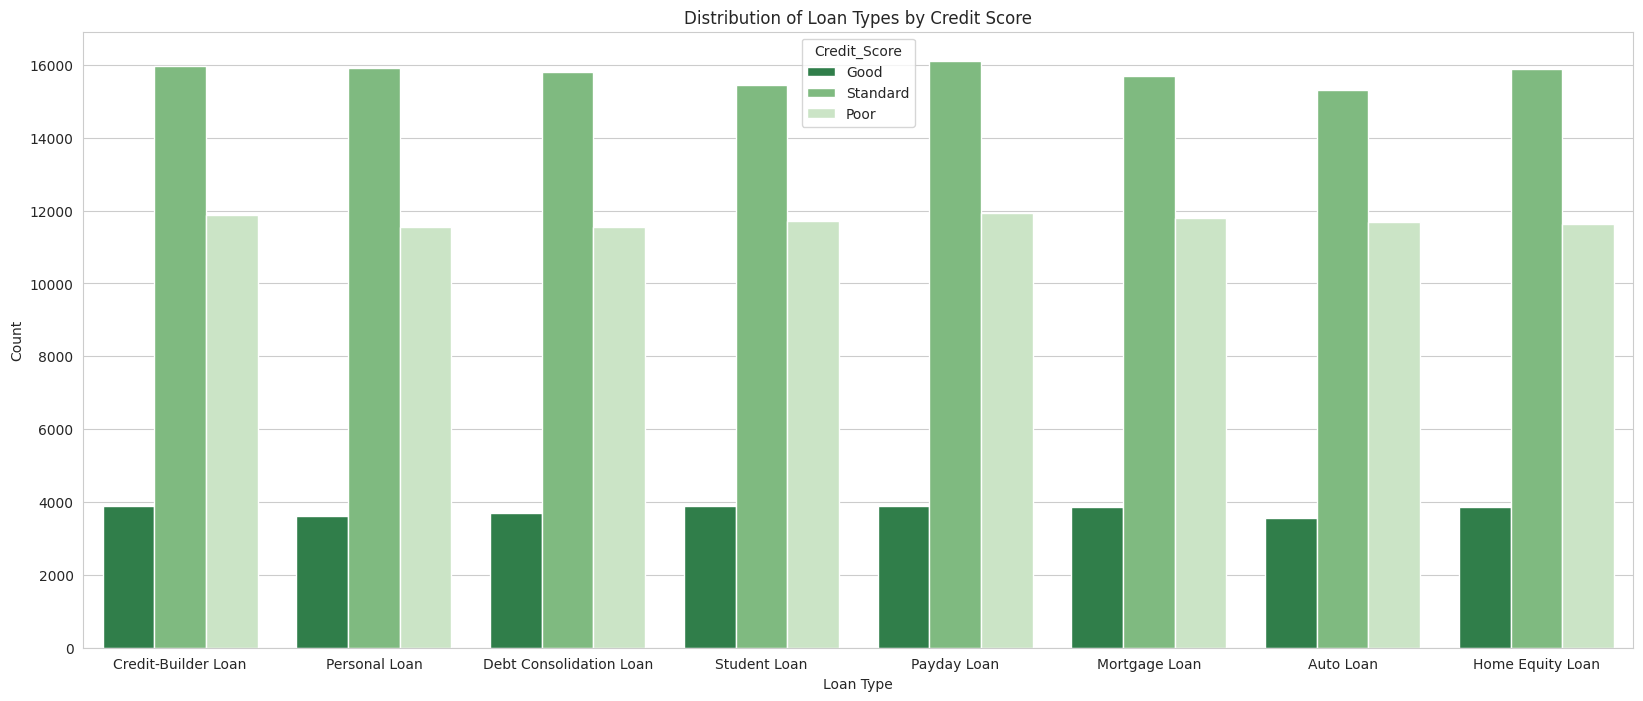

In [ ]:
# Distribution of Loan Types by Credit Score

loan_columns = ['Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan',
                'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan']

df_melted = train.melt(id_vars='Credit_Score', value_vars=loan_columns,
                       var_name='Loan Type', value_name='Has Loan')

plt.figure(figsize=(20,8))
sns.countplot(x='Loan Type', hue='Credit_Score', data=df_melted[df_melted['Has Loan'] == 1], palette='Greens_r')

plt.title('Distribution of Loan Types by Credit Score')
plt.xlabel('Loan Type')
plt.ylabel('Count')

plt.show()


This suggests that certain loan types (`Payday Loans` and `Credit-Builder Loan`) are more common among people with lower credit scores, while those with good credit have fewer loans overall.

## 'Num_of_Delayed_Payment'

The **Num_of_Delayed_Payment** column represents the number of times a customer has delayed their payment beyond the due date.   
This typically refers to the total count of late payments a customer has made on loans, credit cards, or other financial obligations.    
It can be an important feature for credit scoring models, as a higher number of delayed payments usually indicates a higher risk of default or financial instability.


In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Num_of_Delayed_Payment')

Num_of_Delayed_Payment  counts percent
0                       19    5327   5.73%
1                       17    5261   5.66%
2                       16    5173   5.56%
3                       10    5153   5.54%
4                       18    5083   5.47%
..                     ...     ...     ...
744                   3845       1   0.00%
745                   4075       1   0.00%
746                   1502       1   0.00%
747                   1530       1   0.00%
748                   3011       1   0.00%

[749 rows x 3 columns]

In [ ]:
# Check missing values and dtype

print('Remaining missing values in Train:', train['Num_of_Delayed_Payment'].isna().sum())
print('Remaining missing values in Test:', test['Num_of_Delayed_Payment'].isna().sum())
print('dtype: ', train['Num_of_Delayed_Payment'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Num_of_Delayed_Payment')

Remaining missing values in Train: 7002
Remaining missing values in Test: 3498
dtype:  object


{' ',
 ' -',
 ' nan ',
 ' nan -',
 ' nan nan ',
 ' nan nan -',
 ' nan nan nan ',
 ' nan nan nan -',
 ' nan nan nan nan ',
 ' nan nan nan nan nan ',
 '_ ',
 '_ -',
 '_ nan ',
 '_ nan -',
 '_ nan nan '}

**Clean Anomalies in the Column 'Num_of_Delayed_Payment':**

In [ ]:
# TRAIN DATA

# 1. Remove non-numeric characters from the column in train dataset
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))
# Replace empty strings with NaN
train['Num_of_Delayed_Payment'].replace('', np.nan, inplace=True)

# 2. Convert dtype to float in train dataset
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].astype(float)

# 3. Convert negatives like '-1' to positives
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].abs()

In [ ]:
# TEST DATA

# 1. Remove non-numeric characters from 'Num_of_Delayed_Payment' column in the test dataset
test['Num_of_Delayed_Payment'] = test['Num_of_Delayed_Payment'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))

# Replace empty strings with NaN
test['Num_of_Delayed_Payment'].replace('', np.nan, inplace=True)

# 2. Convert 'Num_of_Delayed_Payment' to float in the test dataset
test['Num_of_Delayed_Payment'] = test['Num_of_Delayed_Payment'].astype(float)

# 3. Convert negatives like '-1' to positives
test['Num_of_Delayed_Payment'] = test['Num_of_Delayed_Payment'].abs()

**Filling the Missing Values in 'Num_of_Delayed_Payment':**

In [ ]:
# ============== User-Defined-Fonction ======================

from sklearn.impute import KNNImputer

def knn_impute_column(df, column, n_neighbors=5):
    """
    Impute missing values in the specified column using KNN.
    Args: df (DataFrame), column (str), n_neighbors (int): Number of neighbors (Default is 5).
    Returns: DataFrame: DataFrame with imputed column.
    """
    # Apply KNN imputation to the specified column
    imputer = KNNImputer(n_neighbors=n_neighbors)
    df[[column]] = imputer.fit_transform(df[[column]])

    return df
# ============================================================

In [ ]:
# Apply KNN imputation to 'Num_of_Delayed_Payment' column in both train and test datasets
knn_impute_column(train, 'Num_of_Delayed_Payment') #Train
knn_impute_column(test, 'Num_of_Delayed_Payment') #Test

# Check Missing values
print('Remaining missing values in Train:', train['Num_of_Delayed_Payment'].isna().sum())
print('Remaining missing values in Test:', test['Num_of_Delayed_Payment'].isna().sum())

Remaining missing values in Train: 0
Remaining missing values in Test: 0




KNN Imputer is been used to fill missing values in the specific column

In [ ]:
train['Num_of_Delayed_Payment'].describe()

count   100000.000
mean        30.946
std        217.972
min          0.000
25%          9.000
50%         15.000
75%         19.000
max       4397.000
Name: Num_of_Delayed_Payment, dtype: float64

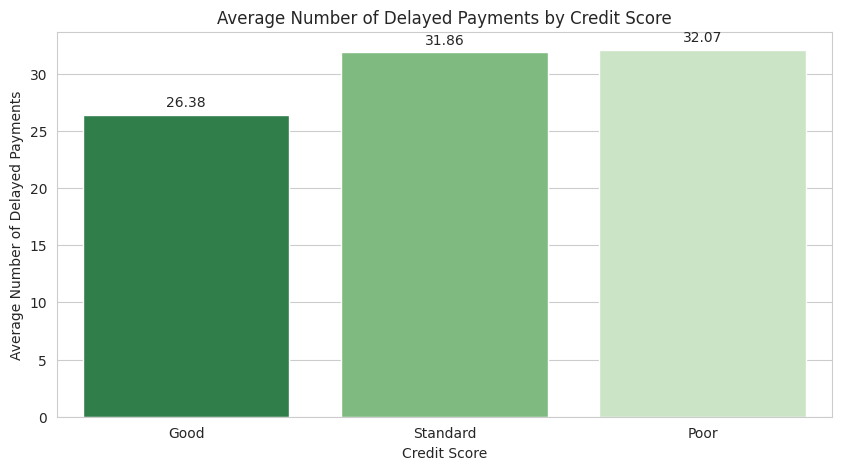

In [ ]:
# Average Num_of_Delayed_Payment by Credit Score
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Num_of_Delayed_Payment', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

# Add labels and title
plt.title('Average Number of Delayed Payments by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Number of Delayed Payments')

plt.show()


   
This indicates that individuals with poorer credit scores are more likely to delay their payments, contributing to their lower credit ratings.

## 'Num_Credit_Inquiries'

The **Num_Credit_Inquiries** column represents the number of credit inquiries made on a customer's credit report. Each inquiry typically occurs when a customer applies for credit, such as a loan or credit card, and lenders request to check the customer's credit history. A higher number of credit inquiries could indicate a higher risk of financial instability, as frequent inquiries may suggest the customer is seeking multiple sources of credit.


In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Num_Credit_Inquiries')

Num_Credit_Inquiries  counts percent
0                    4.000   11271  11.50%
1                    3.000    8890   9.07%
2                    6.000    8111   8.27%
3                    7.000    8058   8.22%
4                    2.000    8028   8.19%
...                    ...     ...     ...
1218              1618.000       1   0.00%
1219               758.000       1   0.00%
1220               735.000       1   0.00%
1221              2483.000       1   0.00%
1222              1960.000       1   0.00%

[1223 rows x 3 columns]

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Num_Credit_Inquiries'].isna().sum())
print('Remaining missing values in Test:', test['Num_Credit_Inquiries'].isna().sum())
print('dtype: ', train['Num_Credit_Inquiries'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Num_Credit_Inquiries')

Remaining missing values in Train: 1965
Remaining missing values in Test: 1035
dtype:  float64


{' ', ' nan ', ' nan nan ', ' nan nan nan ', '.'}

In [ ]:
# Apply KNN imputation to 'Num_Credit_Inquiries' column in both train and test datasets
knn_impute_column(train, 'Num_Credit_Inquiries') # Train
knn_impute_column(test, 'Num_Credit_Inquiries') # Test

# Check Missing values
print('Remaining missing values in Train:', train['Num_Credit_Inquiries'].isna().sum())
print('Remaining missing values in Test:', test['Num_Credit_Inquiries'].isna().sum())

Remaining missing values in Train: 0
Remaining missing values in Test: 0


In [ ]:
train['Num_Credit_Inquiries'].describe()

count   100000.000
mean        27.754
std        191.270
min          0.000
25%          3.000
50%          6.000
75%          9.000
max       2597.000
Name: Num_Credit_Inquiries, dtype: float64

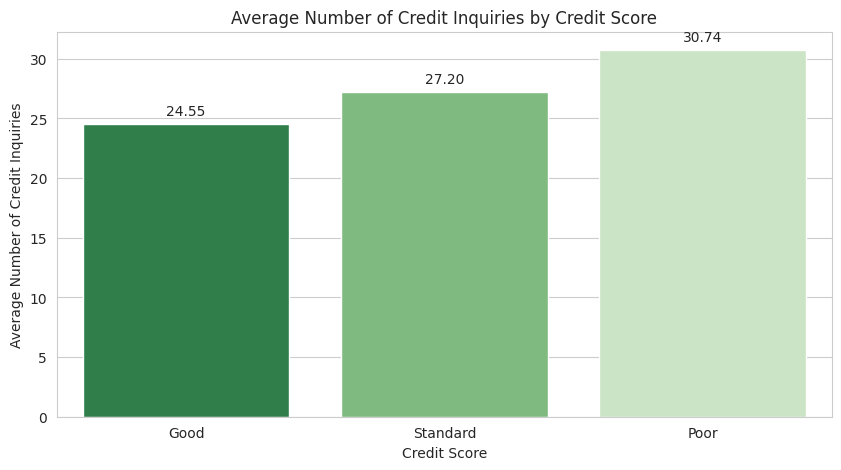

In [ ]:
# Bar plot showing the average number of credit inquiries by credit score category
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Num_Credit_Inquiries', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

# Add labels and title
plt.title('Average Number of Credit Inquiries by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Number of Credit Inquiries')

plt.show()


This suggests that individuals with poorer credit scores may be applying for credit more frequently, possibly indicating financial difficulties or instability.

## 'Credit_History_Age'

The **Credit_History_Age** column represents the total duration of a customer's credit history, originally provided in a string format like "X Years and Y Months."    


In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Credit_History_Age')

Credit_History_Age  counts percent
0    15 Years and 11 Months     446   0.49%
1     19 Years and 4 Months     445   0.49%
2     19 Years and 5 Months     444   0.49%
3    17 Years and 11 Months     443   0.49%
4     19 Years and 3 Months     441   0.48%
..                      ...     ...     ...
399    0 Years and 3 Months      20   0.02%
400    0 Years and 2 Months      15   0.02%
401   33 Years and 7 Months      14   0.02%
402   33 Years and 8 Months      12   0.01%
403    0 Years and 1 Months       2   0.00%

[404 rows x 3 columns]

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Credit_History_Age'].isna().sum())
print('Remaining missing values in Test:', test['Credit_History_Age'].isna().sum())
print('dtype: ', train['Credit_History_Age'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Credit_History_Age')

Remaining missing values in Train: 9030
Remaining missing values in Test: 4470
dtype:  object


{' Months',
 ' Months ',
 ' Months nan ',
 ' Months nan nan ',
 ' Months nan nan nan ',
 ' Months nan nan nan nan ',
 ' Months nan nan nan nan nan ',
 ' Years and '}

In [ ]:
#====================== User-Defined-Fonction==========================
def history_age_month(age):
    """
    This function converts a credit history age string (in the format 'X Years and Y Months')
    into a total number of months.
    """
    try:
        # Extract the years part (before "and")
        years = int(re.findall(r'\d+', age.split("and")[0])[0])

        # Extract the months part (after "and")
        months = int(re.findall(r'\d+', age.split("and")[1])[0])

        # Convert years to months and add the months part
        return int(years * 12 + months)

    except (IndexError, ValueError, AttributeError):
        # Return NaN if the input string is not in the correct format or an error occurs
        return np.nan
#=====================================================================

In [ ]:
# Apply the fonction the the Credit_History_Age Column in Train and Test
train['Credit_History_Age'] = train['Credit_History_Age'].apply(history_age_month)
test['Credit_History_Age'] = test['Credit_History_Age'].apply(history_age_month)

In [ ]:
print('dtype: ', train['Credit_History_Age'].dtypes)
get_value_count(train, 'Credit_History_Age').head()

dtype:  float64


Credit_History_Age  counts percent
0             191.000     446   0.49%
1             232.000     445   0.49%
2             233.000     444   0.49%
3             215.000     443   0.49%
4             231.000     441   0.48%

In [ ]:
# Apply KNN imputation to the column in both train and test datasets
knn_impute_column(train, 'Credit_History_Age') # Train
knn_impute_column(test, 'Credit_History_Age') # Test

# Check Missing values
print('Remaining missing values in Train:', train['Credit_History_Age'].isna().sum())
print('Remaining missing values in Test:', test['Credit_History_Age'].isna().sum())

Remaining missing values in Train: 0
Remaining missing values in Test: 0


In [ ]:
train['Credit_History_Age'].describe()

count   100000.000
mean       221.195
std         95.131
min          1.000
25%        154.000
50%        221.195
75%        292.000
max        404.000
Name: Credit_History_Age, dtype: float64

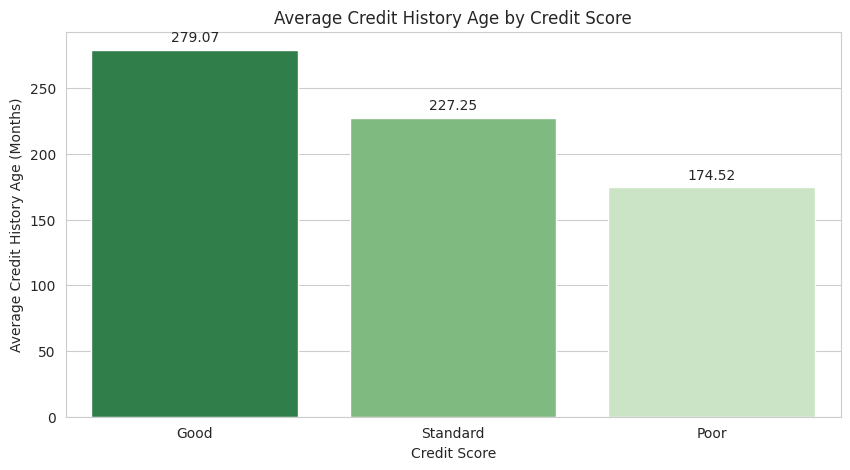

In [ ]:
# Barplot showing the average Credit History Age by Credit Score category
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Credit_History_Age', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.title('Average Credit History Age by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Credit History Age (Months)')

plt.show()


This suggests that a longer credit history may be associated with a better credit score.

## 'Amount_invested_monthly'

The **Amount_invested_monthly** column, represents the monthly investment amount, contained non-numeric characters and missing values.   


In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Amount_invested_monthly')

Amount_invested_monthly  counts percent
0                   __10000__    4305   4.51%
1                         0.0     169   0.18%
2           59.93725850034815       1   0.00%
3            165.180659491917       1   0.00%
4          62.030802602004044       1   0.00%
...                       ...     ...     ...
91044        109.296681189146       1   0.00%
91045        33.6098814431885       1   0.00%
91046       76.87001005130772       1   0.00%
91047       908.6939096189257       1   0.00%
91048      401.35900899207513       1   0.00%

[91049 rows x 3 columns]

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Amount_invested_monthly'].isna().sum())
print('Remaining missing values in Test:', test['Amount_invested_monthly'].isna().sum())
print('dtype: ', train['Amount_invested_monthly'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Amount_invested_monthly')

Remaining missing values in Train: 4479
Remaining missing values in Test: 2271
dtype:  object


{' ',
 ' __',
 ' nan ',
 ' nan __',
 ' nan nan ',
 ' nan nan __',
 ' nan nan nan ',
 ' nan nan nan nan ',
 '.',
 '__ ',
 '__ __',
 '__ nan ',
 '__ nan __',
 '__ nan nan ',
 '__ nan nan __'}

In [ ]:
# CLEANING UNUSUAL VALUES

#TRAIN
# 1. Remove non-numeric characters from the column in train dataset
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))
# Replace empty strings with NaN
train['Amount_invested_monthly'].replace('', np.nan, inplace=True)

# 2. Convert dtype to float in train dataset
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].astype(float)

# 3. Convert negatives like '-1' to positives
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].abs()



In [ ]:
#TEST
# 1. Remove non-numeric characters from the column in test dataset
test['Amount_invested_monthly'] = test['Amount_invested_monthly'].apply(lambda x: re.sub(r'[^0-9.]', '', str(x)))
# Replace empty strings with NaN
test['Amount_invested_monthly'].replace('', np.nan, inplace=True)

# 2. Convert dtype to float in test dataset
test['Amount_invested_monthly'] = test['Amount_invested_monthly'].astype(float)

# 3. Convert negatives like '-1' to positives
test['Amount_invested_monthly'] = test['Amount_invested_monthly'].abs()

In [ ]:
# FILLING MISSING VALUES

# Apply KNN imputation to the column in both train and test datasets
knn_impute_column(train, 'Amount_invested_monthly') # Train
knn_impute_column(test, 'Amount_invested_monthly') # Test

# Check Missing values
print('Remaining missing values in Train:', train['Amount_invested_monthly'].isna().sum())
print('Remaining missing values in Test:', test['Amount_invested_monthly'].isna().sum())

Remaining missing values in Train: 0
Remaining missing values in Test: 0


In [ ]:
train['Amount_invested_monthly'].describe()

count   100000.000
mean       637.413
std       1997.035
min          0.000
25%         77.017
50%        143.128
75%        304.766
max      10000.000
Name: Amount_invested_monthly, dtype: float64

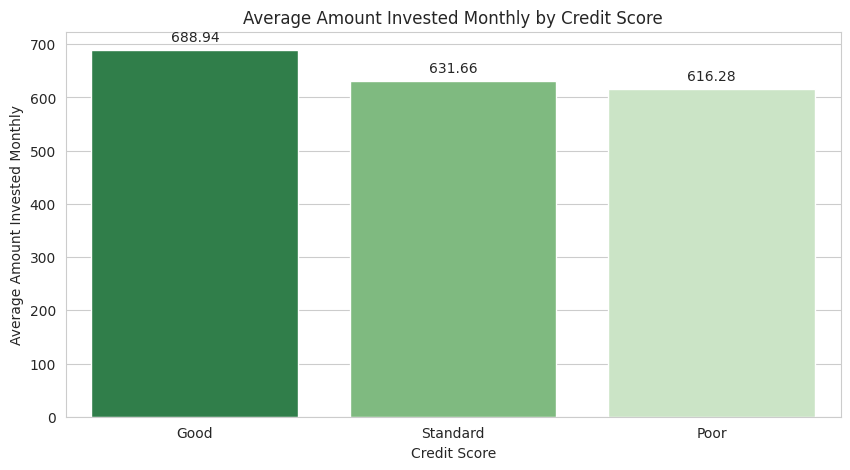

In [ ]:
# Barplot showing the average Amount Invested Monthly by Credit Score category
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Amount_invested_monthly', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.title('Average Amount Invested Monthly by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Amount Invested Monthly')

plt.show()


This suggests a potential positive correlation between higher monthly investments and better credit scores.

## 'Monthly_Balance'

The **`Monthly_Balance`** column reflects the remaining balance in a customer's account at the end of each month after accounting for all expenses and income. It provides insights into a customer’s financial stability and management.


In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Monthly_Balance')

Monthly_Balance  counts percent
0      __-333333333333333333333333333__       9   0.01%
1                    252.08489793906085       1   0.00%
2                     254.9709216273975       1   0.00%
3                     250.0931678204641       1   0.00%
4                     289.7550752754317       1   0.00%
...                                 ...     ...     ...
98787                 278.8720257394474       1   0.00%
98788                 376.7024623690405       1   0.00%
98789                 321.2336043357731       1   0.00%
98790                373.29270287694055       1   0.00%
98791                 336.6371802877606       1   0.00%

[98792 rows x 3 columns]

- The value `333333333333333333.0` in the `Monthly_Balance` column seems unusually large and likely erroneous compared to other values.  
It has been replaced with `NaN` for proper handling later.

In [ ]:
train['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan,inplace=True)
test['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan,inplace=True)

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Monthly_Balance'].isna().sum())
print('Remaining missing values in Test:', test['Monthly_Balance'].isna().sum())
print('dtype: ', train['Monthly_Balance'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Monthly_Balance')

Remaining missing values in Train: 1209
Remaining missing values in Test: 568
dtype:  object


{' ', ' nan ', ' nan nan ', ' nan nan nan ', ' nan nan nan nan ', '.'}

**Cleaning Unusual Values:**

In [ ]:
#TRAIN
# 1. Identify and convert hexadecimal values to decimal
train['Monthly_Balance'] = train['Monthly_Balance'].apply(lambda x: int(x, 16) if isinstance(x, str) and x.startswith('0x') else x)

# 2. Remove non-numeric characters (keeping only digits and decimals)
train['Monthly_Balance'] = train['Monthly_Balance'].apply(lambda x: re.sub(r'[^0-9.]+', '', str(x)))

# 3. Replace empty strings with NaN
train['Monthly_Balance'].replace('', np.nan, inplace=True)

# 4. Convert dtype to float and coerce errors to NaN (invalid strings to NaN)
train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce')

# 5. Convert negative values to positives if needed
train['Monthly_Balance'] = train['Monthly_Balance'].abs()

In [ ]:
#TEST
# 1. Identify and convert hexadecimal values to decimal
test['Monthly_Balance'] = test['Monthly_Balance'].apply(lambda x: int(x, 16) if isinstance(x, str) and x.startswith('0x') else x)

# 2. Remove non-numeric characters (keeping only digits and decimals)
test['Monthly_Balance'] = test['Monthly_Balance'].apply(lambda x: re.sub(r'[^0-9.]+', '', str(x)))

# 3. Replace empty strings with NaN
test['Monthly_Balance'].replace('', np.nan, inplace=True)

# 4. Convert dtype to float and coerce errors to NaN (invalid strings to NaN)
test['Monthly_Balance'] = pd.to_numeric(test['Monthly_Balance'], errors='coerce')

# 5. Convert negative values to positives if needed
test['Monthly_Balance'] = test['Monthly_Balance'].abs()

In [ ]:
get_value_count(train, 'Monthly_Balance').head()

Monthly_Balance  counts percent
0          393.674       1   0.00%
1          312.494       1   0.00%
2          284.629       1   0.00%
3          331.210       1   0.00%
4          223.451       1   0.00%

In [ ]:
train['Monthly_Balance'].describe()

count   98791.000
mean      402.551
std       213.925
min         0.008
25%       270.107
50%       336.731
75%       470.263
max      1602.041
Name: Monthly_Balance, dtype: float64

In [ ]:
# numeric columns
numeric_columns = train.select_dtypes(include=[np.number])

# Calculate and sort the absolute correlation matrix
df_corr = numeric_columns.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()

# Filter the columns that are related to the 'Monthly_Balance' column
df_corr[df_corr['level_0'] == 'Monthly_Balance'].head()


level_0                   level_1     0
9   Monthly_Balance           Monthly_Balance 1.000
26  Monthly_Balance        Credit_History_Age 0.310
28  Monthly_Balance       Delay_from_due_date 0.279
29  Monthly_Balance  Credit_Utilization_Ratio 0.251
61  Monthly_Balance       Credit-Builder Loan 0.187

In [ ]:
# Group by 'Delay_from_due_date' and fill missing values in 'Monthly_Balance' with the group's mean
#Train
train['Monthly_Balance'] = train.groupby('Delay_from_due_date')['Monthly_Balance'].transform(lambda x: x.fillna(x.mean()))
#Test
test['Monthly_Balance'] = train.groupby('Delay_from_due_date')['Monthly_Balance'].transform(lambda x: x.fillna(x.mean()))

# Check Missing values
print('Remaining missing values in Train:', train['Monthly_Balance'].isna().sum())
print('Remaining missing values in Test:', test['Monthly_Balance'].isna().sum())

Remaining missing values in Train: 0
Remaining missing values in Test: 0


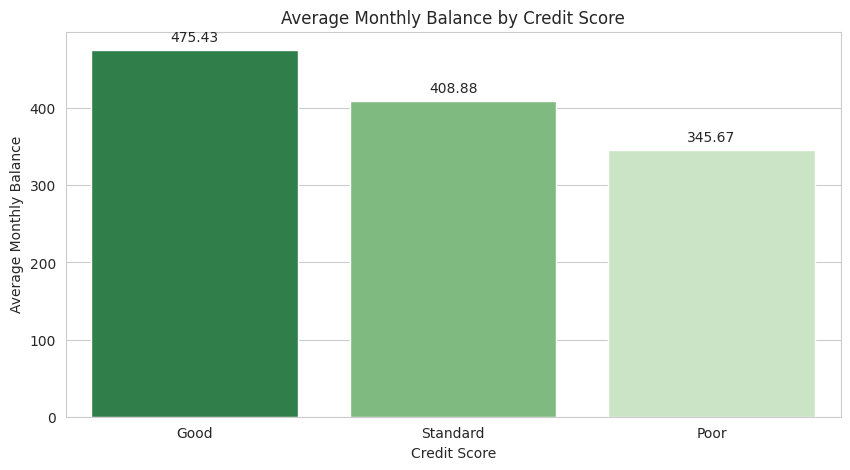

In [ ]:
# Barplot showing the average Monthly Balance by Credit Score category
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Monthly_Balance', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.title('Average Monthly Balance by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Monthly Balance')

plt.show()


This suggests that higher credit scores may be associated with better financial management, leading to higher retained balances.

## 'Month'

The **`Month`** column in the dataset represents the month in which specific transactions or financial activities occurred. It could have provided important time-related context, allowing us to analyze patterns and trends over different months.

In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Month')

Month  counts percent
0   January   12500  12.50%
1  February   12500  12.50%
2     March   12500  12.50%
3     April   12500  12.50%
4       May   12500  12.50%
5      June   12500  12.50%
6      July   12500  12.50%
7    August   12500  12.50%

In [ ]:
# Check the column' unique values and percentage
get_value_count(test, 'Month')

Month  counts percent
0  September   12500  25.00%
1    October   12500  25.00%
2   November   12500  25.00%
3   December   12500  25.00%

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Month'].isna().sum())
print('Remaining missing values in Test:', test['Month'].isna().sum())
print('dtype: ', train['Month'].dtypes)

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  object


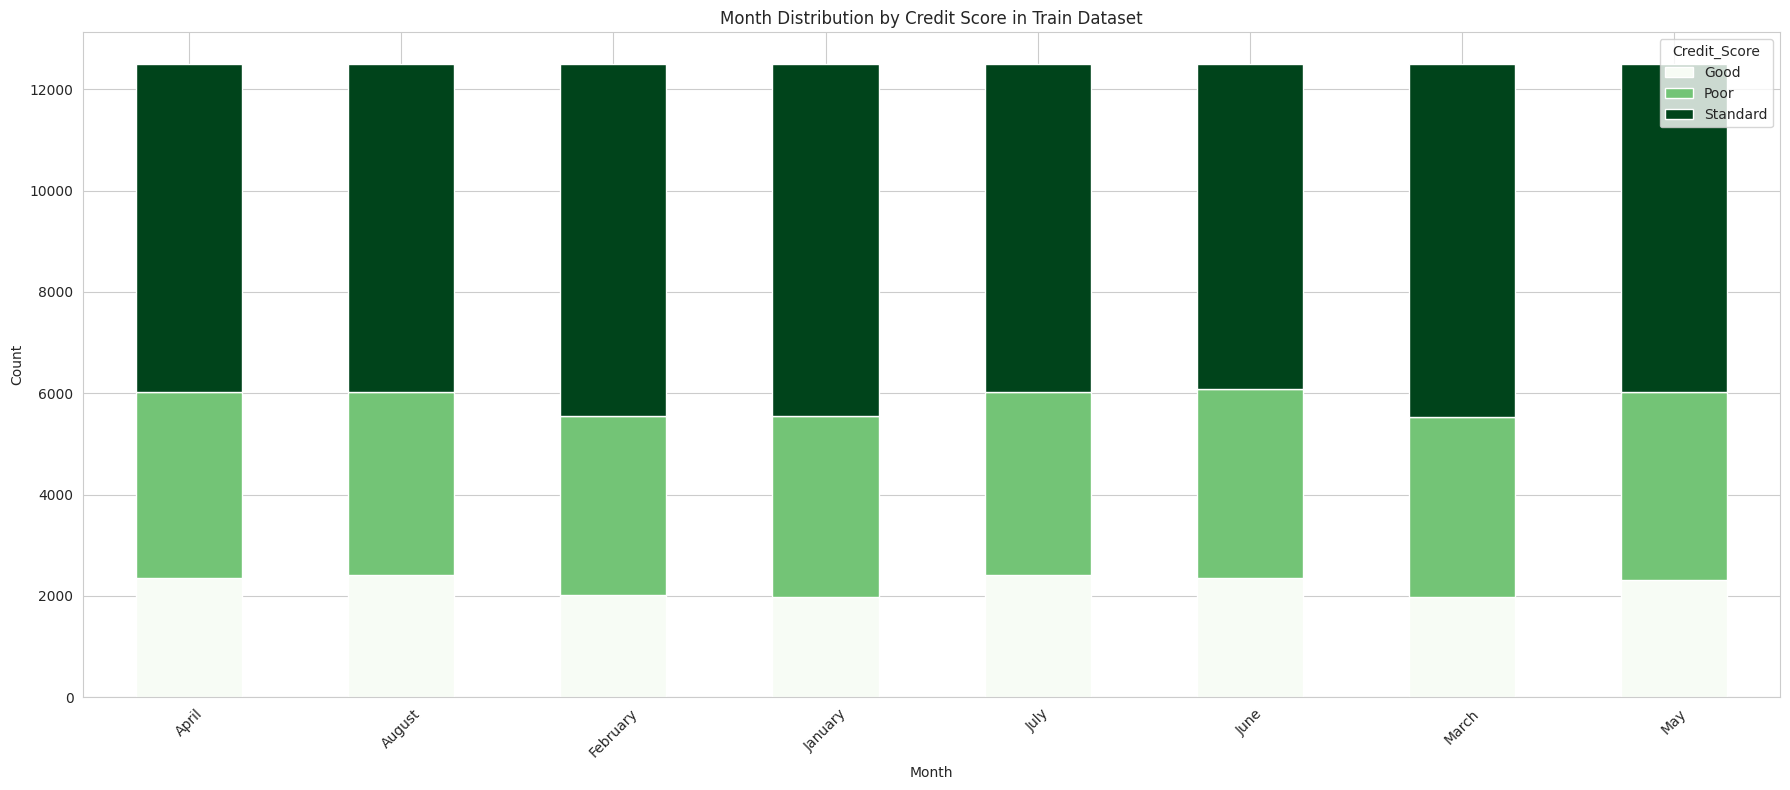

In [ ]:
train.groupby(['Month', 'Credit_Score']).size().unstack().plot(kind='bar', stacked=True, figsize=(18,8), cmap='Greens')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Month Distribution by Credit Score in Train Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The proportions of each credit score category don't vary significantly month by month, indicating that the `Credit_Score` feature doesn't show a noticeable seasonal trend.

## 'Age'

The **`Age`** column represents the age of the customer, providing important demographic information that may influence financial behavior and creditworthiness.

-The limit lies between 18 to 70 years.

In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Age')

Age  counts percent
0       38    2833   2.83%
1       28    2829   2.83%
2       31    2806   2.81%
3       26    2792   2.79%
4       32    2749   2.75%
...    ...     ...     ...
1783  6618       1   0.00%
1784  3155       1   0.00%
1785  5063       1   0.00%
1786  2875       1   0.00%
1787  4347       1   0.00%

[1788 rows x 3 columns]

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Age'].isna().sum())
print('Remaining missing values in Test:', test['Age'].isna().sum())
print('dtype: ', train['Age'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Age')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  object


{' ', ' -', '_ ', '_ -'}

**Cleaning Unusual Values on 'Age':**

In [ ]:
#TRAIN
#  Remove non-numeric characters (keeping only digits and decimals)
train['Age'] = train['Age'].apply(lambda x: re.sub(r'[^0-9.]+', '', str(x)))

# Convert dtype to float and coerce errors to NaN (invalid strings to NaN)
train['Age'] = pd.to_numeric(train['Age'], errors='coerce')

# Replace unrealistic Age values with NaN (Age > 100 or Age < 0)
train.loc[(train['Age'] > 70) | (train['Age'] < 18), 'Age'] = np.nan

In [ ]:
#TEST
#  Remove non-numeric characters (keeping only digits and decimals)
test['Age'] = test['Age'].apply(lambda x: re.sub(r'[^0-9.]+', '', str(x)))

# Convert dtype to float and coerce errors to NaN (invalid strings to NaN)
test['Age'] = pd.to_numeric(test['Age'], errors='coerce')

# Replace unrealistic Age values with NaN (Age > 100 or Age < 0)
test.loc[(test['Age'] > 70) | (test['Age'] < 18), 'Age'] = np.nan

In [ ]:
get_value_count(train, 'Age').head()

Age  counts percent
0 38.000    2994   3.27%
1 28.000    2968   3.24%
2 31.000    2955   3.23%
3 26.000    2945   3.22%
4 32.000    2884   3.15%

In [ ]:
train['Age'].describe()

count   91513.000
mean       34.426
std        10.114
min        18.000
25%        26.000
50%        34.000
75%        42.000
max        56.000
Name: Age, dtype: float64

**Filling Missing Values on 'Age':**

To avoid losing data, age values outside a reasonable limit (18-70) were replaced with NaN instead of being dropped.

In [ ]:
print('Remaining missing values in Train:', train['Age'].isna().sum())
print('Remaining missing values in Test:', test['Age'].isna().sum())

Remaining missing values in Train: 8487
Remaining missing values in Test: 3907


In [ ]:
# Check the correlation between Age and other Features
numeric_columns = train.select_dtypes(include=[np.number])
# Calculate and sort the absolute correlation matrix
df_corr = numeric_columns.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
# Filter the columns that are related to the 'Monthly_Balance' column
df_corr[df_corr['level_0'] == 'Age'].head()

level_0              level_1     0
20     Age                  Age 1.000
67     Age   Credit_History_Age 0.178
83     Age  Delay_from_due_date 0.138
95     Age      Monthly_Balance 0.086
96     Age        Personal Loan 0.084

In [ ]:
train.groupby(['Credit_History_Age','Delay_from_due_date'])['Age'].mean()

Credit_History_Age  Delay_from_due_date
1.000               33                    31.000
2.000               27                    35.000
                    33                    29.000
                    36                       NaN
                    37                    36.000
                                           ...  
404.000             9                     32.000
                    11                    25.000
                    12                    22.500
                    26                    54.000
                    30                    41.000
Name: Age, Length: 18345, dtype: float64

In [ ]:
# Fill the missing values based on the train dataset
#Train
train['Age'] = train.groupby(['Credit_History_Age', 'Delay_from_due_date'])['Age'].transform(lambda x: x.fillna(x.mean()))
# For remaining missing values, fill with the global mean
train['Age'].fillna(train['Age'].mean(), inplace=True)

#Test
test['Age'] = train.groupby(['Credit_History_Age', 'Delay_from_due_date'])['Age'].transform(lambda x: x.fillna(x.mean()))
# For remaining missing values, fill with the global mean
test['Age'].fillna(train['Age'].mean(), inplace=True)

# Check the results
train['Age'].describe()

count   100000.000
mean        34.335
std          9.784
min         18.000
25%         26.000
50%         34.000
75%         42.000
max         56.000
Name: Age, dtype: float64

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Age'].isna().sum())
print('Remaining missing values in Test:', test['Age'].isna().sum())
print('dtype: ', train['Age'].dtypes)

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  float64


In [ ]:
import plotly.express as px
# Creating a boxplot to visualize the distribution of 'Age' based on 'Credit_Score'
fig = px.box(train, x='Credit_Score', y='Age', title='Age Distribution by Credit Score')
fig.show()

## 'Occupation'

The `Occupation` column represents the type of job or profession of the customer. It provides important demographic and financial context as different occupations often have different levels of income, spending habits, and risk profiles, which are crucial for credit scoring and other financial analyses.

In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Occupation')

Occupation  counts percent
0         _______    7062   7.06%
1          Lawyer    6575   6.58%
2       Architect    6355   6.35%
3        Engineer    6350   6.35%
4       Scientist    6299   6.30%
5        Mechanic    6291   6.29%
6      Accountant    6271   6.27%
7       Developer    6235   6.24%
8   Media_Manager    6232   6.23%
9         Teacher    6215   6.21%
10   Entrepreneur    6174   6.17%
11         Doctor    6087   6.09%
12     Journalist    6085   6.08%
13        Manager    5973   5.97%
14       Musician    5911   5.91%
15         Writer    5885   5.88%

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Occupation'].isna().sum())
print('Remaining missing values in Test:', test['Occupation'].isna().sum())
print('dtype: ', train['Occupation'].dtypes)

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  object


**Cleaning Unusual Values:**

In [ ]:
# Replace '---' with a new category 'Unknown'
train['Occupation'].replace('_______', 'Unknown', inplace=True)
test['Occupation'].replace('_______', 'Unknown', inplace=True)

In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Occupation')

Occupation  counts percent
0         Unknown    7062   7.06%
1          Lawyer    6575   6.58%
2       Architect    6355   6.35%
3        Engineer    6350   6.35%
4       Scientist    6299   6.30%
5        Mechanic    6291   6.29%
6      Accountant    6271   6.27%
7       Developer    6235   6.24%
8   Media_Manager    6232   6.23%
9         Teacher    6215   6.21%
10   Entrepreneur    6174   6.17%
11         Doctor    6087   6.09%
12     Journalist    6085   6.08%
13        Manager    5973   5.97%
14       Musician    5911   5.91%
15         Writer    5885   5.88%

In [ ]:
get_value_count(test, 'Occupation')

Occupation  counts percent
0         Unknown    3438   6.88%
1          Lawyer    3324   6.65%
2        Engineer    3212   6.42%
3       Architect    3195   6.39%
4        Mechanic    3168   6.34%
5       Developer    3146   6.29%
6      Accountant    3133   6.27%
7   Media_Manager    3130   6.26%
8       Scientist    3104   6.21%
9         Teacher    3103   6.21%
10   Entrepreneur    3103   6.21%
11     Journalist    3037   6.07%
12         Doctor    3027   6.05%
13        Manager    3000   6.00%
14       Musician    2947   5.89%
15         Writer    2933   5.87%

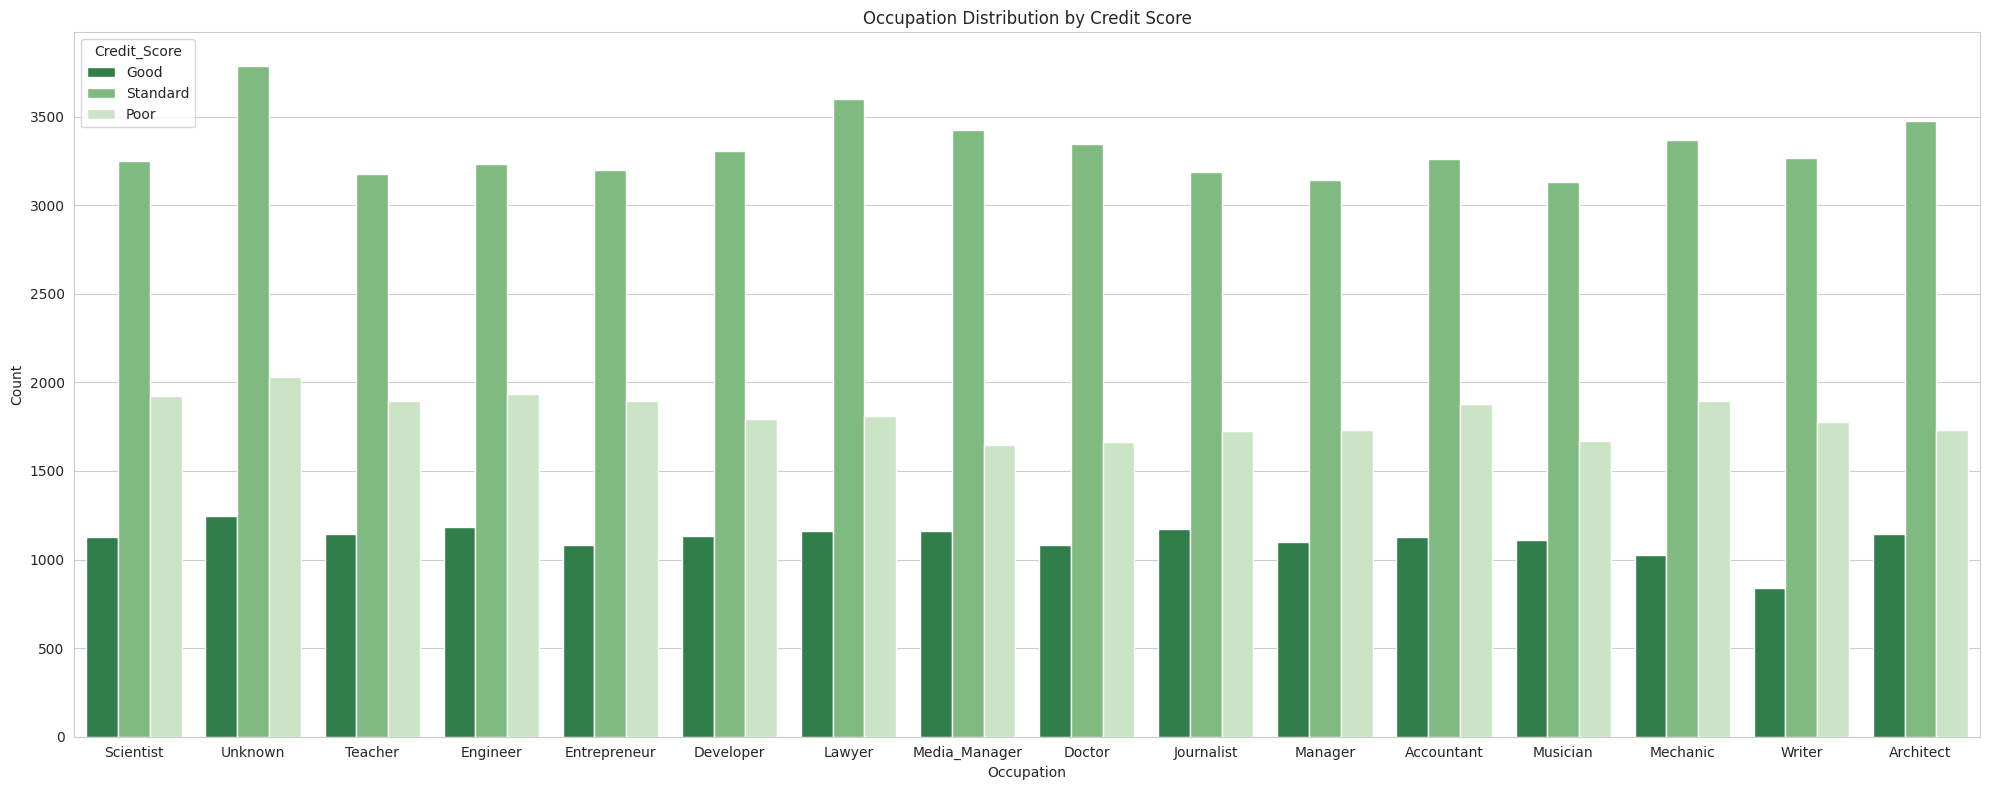

In [ ]:
# Create a count plot to visualize 'Occupation' distribution based on 'Credit_Score' (target feature)
plt.figure(figsize=(20, 8))
sns.countplot(x='Occupation', hue='Credit_Score', data=train, palette='Greens_r')

# Add labels and title
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Occupation Distribution by Credit Score')
#plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

- The graph shows that across most occupations, the majority of individuals fall into the **Standard** credit score category.


## 'Num_Bank_Accounts'

The **`Num_Bank_Accounts`** column represents the number of bank accounts a customer holds.
Upon reviewing the data, an unusual value of `-1` was identified. Since it is not possible to have a negative number of bank accounts, this value likely represents missing or unknown data.


In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Num_Bank_Accounts')

Num_Bank_Accounts  counts percent
0                    6   13001  13.00%
1                    7   12823  12.82%
2                    8   12765  12.77%
3                    4   12186  12.19%
4                    5   12118  12.12%
..                 ...     ...     ...
938               1091       1   0.00%
939               1123       1   0.00%
940               1657       1   0.00%
941                299       1   0.00%
942               1240       1   0.00%

[943 rows x 3 columns]

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Num_Bank_Accounts'].isna().sum())
print('Remaining missing values in Test:', test['Num_Bank_Accounts'].isna().sum())
print('dtype: ', train['Num_Bank_Accounts'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Num_Bank_Accounts')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  int64


{' ', ' -'}

In [ ]:
# Print the list of unique negative values
print('List of unique negative values:', train[train['Num_Bank_Accounts'] < 0]['Num_Bank_Accounts'].unique())
# Print the count of rows with negative values
print('Number of unique negative values:', train[train['Num_Bank_Accounts'] < 0]['Num_Bank_Accounts'].count())

List of unique negative values: [-1]
Number of unique negative values: 21


In [ ]:
# Replace -1 values with 0, assuming no bank accounts
train['Num_Bank_Accounts'].replace(-1, 0, inplace=True) #Train
test['Num_Bank_Accounts'].replace(-1, 0, inplace=True) #Test

In [ ]:
# Check unusual values
print('List of unique negative values:', train[train['Num_Bank_Accounts'] < 0]['Num_Bank_Accounts'].unique())
print('Number of unique negative values:', train[train['Num_Bank_Accounts'] < 0]['Num_Bank_Accounts'].count())

List of unique negative values: []
Number of unique negative values: 0


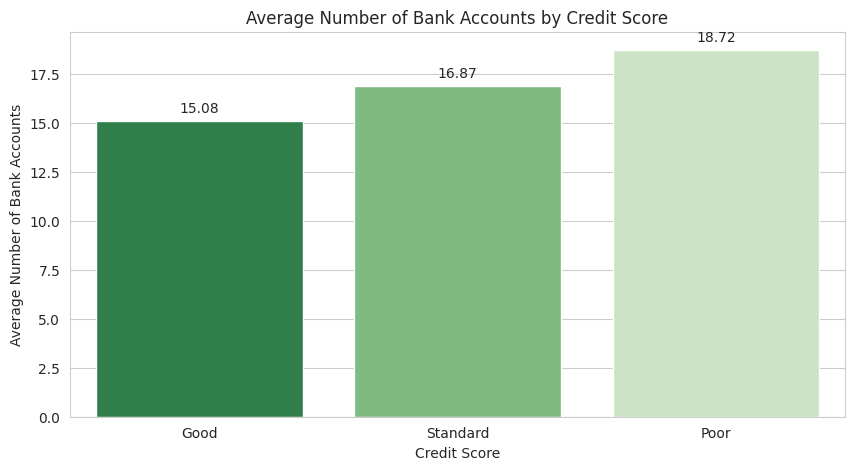

In [ ]:
# Barplot showing the average Number of Bank Accounts by Credit Score category
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Num_Bank_Accounts', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.title('Average Number of Bank Accounts by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Number of Bank Accounts')

plt.show()



This suggests a possible correlation between having more bank accounts and a poorer credit score.

## 'Num_Credit_Card'

In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Num_Credit_Card')

Num_Credit_Card  counts percent
0                   5   18459  18.46%
1                   7   16615  16.61%
2                   6   16559  16.56%
3                   4   14030  14.03%
4                   3   13277  13.28%
...               ...     ...     ...
1174             1405       1   0.00%
1175              708       1   0.00%
1176               62       1   0.00%
1177              343       1   0.00%
1178              481       1   0.00%

[1179 rows x 3 columns]

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Num_Credit_Card'].isna().sum())
print('Remaining missing values in Test:', test['Num_Credit_Card'].isna().sum())
print('dtype: ', train['Num_Credit_Card'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Num_Credit_Card')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  int64


{' '}

In [ ]:
# Print the list of unique negative values
print('List of unique negative values:', train[train['Num_Credit_Card'] < 0]['Num_Credit_Card'].unique())
# Print the count of rows with negative values
print('Number of unique negative values:', train[train['Num_Credit_Card'] < 0]['Num_Credit_Card'].count())

List of unique negative values: []
Number of unique negative values: 0


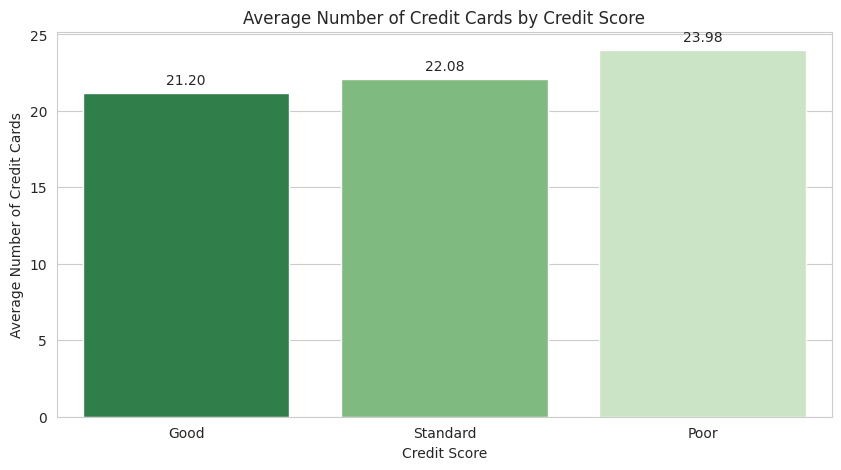

In [ ]:
# Barplot showing the average Number of Credit Cards by Credit Score category
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Num_Credit_Card', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.title('Average Number of Credit Cards by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Number of Credit Cards')

plt.show()

- There is a possible correlation between having more credit cards and a poorer credit score, similar to the behavior observed with the number of bank accounts.

## 'Num_of_Loan'

In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Num_of_Loan')

Num_of_Loan  counts percent
0             3   14386  14.39%
1             2   14250  14.25%
2             4   14016  14.02%
3             0   10380  10.38%
4             1   10083  10.08%
..          ...     ...     ...
429          41       1   0.00%
430          18       1   0.00%
431          56       1   0.00%
432         657       1   0.00%
433         917       1   0.00%

[434 rows x 3 columns]

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Num_of_Loan'].isna().sum())
print('Remaining missing values in Test:', test['Num_of_Loan'].isna().sum())
print('dtype: ', train['Num_of_Loan'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Num_of_Loan')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  object


{' ', ' -', '_ ', '_ -'}

In [ ]:
#TRAIN
# Remove non-numeric characters (keeping only digits and decimals)
train['Num_of_Loan'] = train['Num_of_Loan'].apply(lambda x: re.sub(r'[^0-9.]+', '', str(x)))

# Replace empty strings with NaN
train['Num_of_Loan'].replace('', np.nan, inplace=True)

# Convert dtype to float and coerce errors to NaN (invalid strings to NaN)
train['Num_of_Loan'] = pd.to_numeric(train['Num_of_Loan'], errors='coerce')

# Convert negative values to positives if needed
train['Num_of_Loan'] = train['Num_of_Loan'].abs()

In [ ]:
#TEST
#  Remove non-numeric characters (keeping only digits and decimals)
test['Num_of_Loan'] = test['Num_of_Loan'].apply(lambda x: re.sub(r'[^0-9.]+', '', str(x)))

#  Replace empty strings with NaN
test['Num_of_Loan'].replace('', np.nan, inplace=True)

# Convert dtype to float and coerce errors to NaN (invalid strings to NaN)
test['Num_of_Loan'] = pd.to_numeric(test['Num_of_Loan'], errors='coerce')

# Convert negative values to positives if needed
test['Num_of_Loan'] = test['Num_of_Loan'].abs()

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Num_of_Loan'].isna().sum())
print('Remaining missing values in Test:', test['Num_of_Loan'].isna().sum())
print('dtype: ', train['Num_of_Loan'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Num_of_Loan')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  int64


{' '}

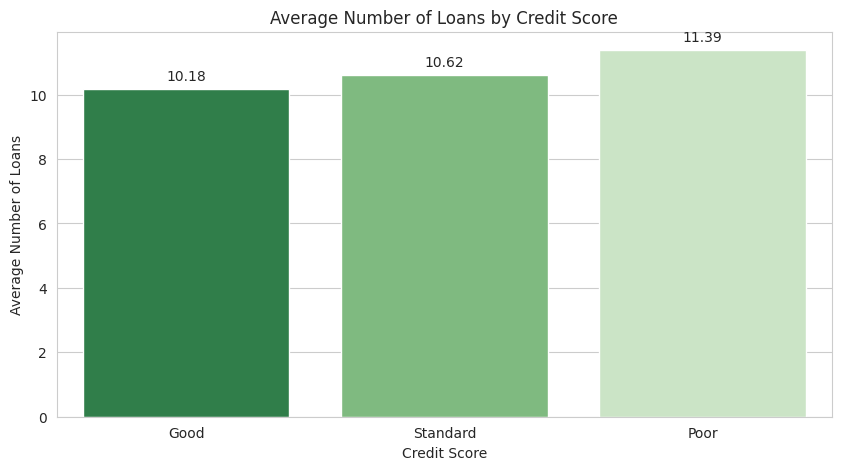

In [ ]:
# Barplot showing the average Number of Loans by Credit Score category
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Num_of_Loan', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.title('Average Number of Loans by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Number of Loans')

plt.show()

- Similar correlation between having more `Loans` and a `poorer credit score`, similar to the behavior observed with the `number of bank accounts` and `number of credit cards`.

## 'Interest_Rate'

The **`Interest_Rate`** column represents the interest rate applied to loans or credit taken by the customer.   
It provides critical information about the cost of borrowing for each customer.   

In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Interest_Rate')

Interest_Rate  counts percent
0                 8    5012   5.01%
1                 5    4979   4.98%
2                 6    4721   4.72%
3                10    4540   4.54%
4                12    4540   4.54%
...             ...     ...     ...
1745           2548       1   0.00%
1746            967       1   0.00%
1747           3790       1   0.00%
1748           3782       1   0.00%
1749           4372       1   0.00%

[1750 rows x 3 columns]

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Interest_Rate'].isna().sum())
print('Remaining missing values in Test:', test['Interest_Rate'].isna().sum())
print('dtype: ', train['Interest_Rate'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Interest_Rate')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  int64


{' '}

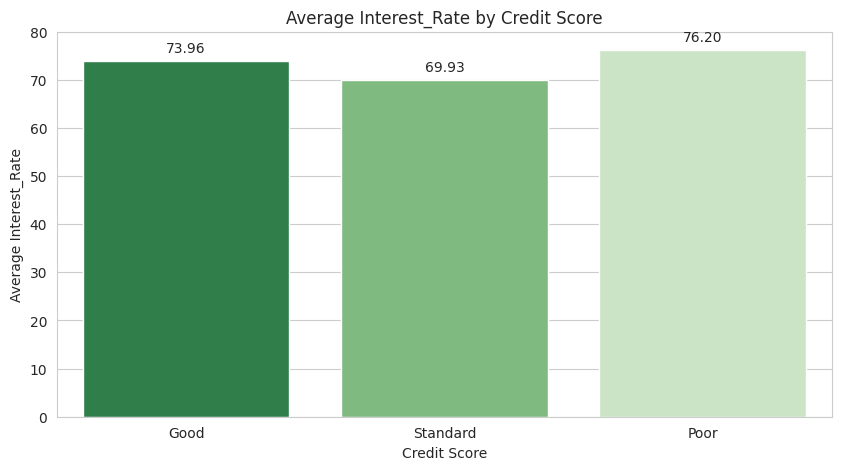

In [ ]:
# Barplot showing the average Interest_Rate by Credit Score category
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Interest_Rate', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.title('Average Interest_Rate by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Interest_Rate')

plt.show()

- Individuals with a **Poor** credit score have the highest average interest rate (76.20), while those with a **Standard** credit score have the lowest (69.93).
- Interestingly, customers with a **Good** credit score still face a relatively high interest rate (73.96), suggesting possible inconsistencies in how interest rates are assigned across credit score categories.

## 'Delay_from_due_date'

The **`Delay_from_due_date`** column represents the number of days a payment is overdue, which is a critical indicator of a customer's payment behavior and financial responsibility.    
This feature is important for analysis and modeling as it directly reflects the risk of default, making it highly relevant for credit scoring and risk assessment models.


In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Delay_from_due_date').head(10)

Delay_from_due_date  counts percent
0                   15    3596   3.60%
1                   13    3424   3.42%
2                    8    3324   3.32%
3                   14    3313   3.31%
4                   10    3281   3.28%
5                    7    3234   3.23%
6                    9    3233   3.23%
7                   11    3182   3.18%
8                   12    3141   3.14%
9                    6    3137   3.14%

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Delay_from_due_date'].isna().sum())
print('Remaining missing values in Test:', test['Delay_from_due_date'].isna().sum())
print('dtype: ', train['Delay_from_due_date'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Delay_from_due_date')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  int64


{' ', ' -'}

In [ ]:
# Print the list of unique negative values
print('List of unique negative values:', train[train['Delay_from_due_date'] < 0]['Delay_from_due_date'].unique())
# Print the count of rows with negative values
print('Number of unique negative values:', train[train['Delay_from_due_date'] < 0]['Delay_from_due_date'].count())

List of unique negative values: [-1 -2 -3 -5 -4]
Number of unique negative values: 591


In [ ]:
# Convert negative values to positives if needed
train['Delay_from_due_date'] = train['Delay_from_due_date'].abs() # Train
test['Delay_from_due_date'] = test['Delay_from_due_date'].abs() # Test

In [ ]:
# Print the list of unique negative values
print('List of unique negative values:', train[train['Delay_from_due_date'] < 0]['Delay_from_due_date'].unique())
# Print the count of rows with negative values
print('Number of unique negative values:', train[train['Delay_from_due_date'] < 0]['Delay_from_due_date'].count())

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Delay_from_due_date')

List of unique negative values: []
Number of unique negative values: 0


{' '}

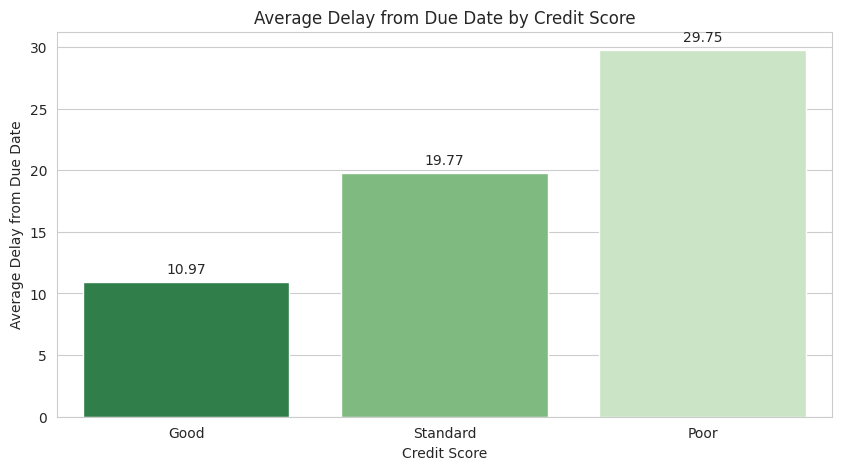

In [ ]:
# Barplot showing the average Delay from Due Date by Credit Score category
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Delay_from_due_date', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.title('Average Delay from Due Date by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Delay from Due Date')

plt.show()


This suggests that late payments are strongly correlated with a poorer credit score.

## 'Changed_Credit_Limit'

The **`Changed_Credit_Limit`** column tracks changes in a customer's credit limit, with positive values indicating an increase and negative values indicating a decrease.


In [ ]:
# Check the column' unique values and percentage
get_value_count(train, 'Changed_Credit_Limit')

Changed_Credit_Limit  counts percent
0                       _    2091   2.09%
1                    8.22     133   0.13%
2                    11.5     127   0.13%
3                   11.32     126   0.13%
4                    7.35     121   0.12%
...                   ...     ...     ...
4379                30.16       1   0.00%
4380    4.710000000000001       1   0.00%
4381                -4.39       1   0.00%
4382                27.38       1   0.00%
4383                16.63       1   0.00%

[4384 rows x 3 columns]

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Changed_Credit_Limit'].isna().sum())
print('Remaining missing values in Test:', test['Changed_Credit_Limit'].isna().sum())
print('dtype: ', train['Changed_Credit_Limit'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Changed_Credit_Limit')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  object


{' ', ' -', ' _ ', ' _ -', ' _ _ ', '.'}

In [ ]:
#TRAIN: Cleaning
# Remove non-numeric characters (keeping only digits and decimals)
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].apply(lambda x: re.sub(r'[^0-9.-]+', '', str(x)))

# Replace empty strings with 0 !!!!!!!!!!!!!
train['Changed_Credit_Limit'].replace('', 0, inplace=True)

# Convert dtype to float and coerce errors to NaN (invalid strings to NaN)
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors='coerce')

In [ ]:
#TEST: Cleaning
#  Remove non-numeric characters (keeping only digits and decimals)
test['Changed_Credit_Limit'] = test['Changed_Credit_Limit'].apply(lambda x: re.sub(r'[^0-9.-]+', '', str(x)))

#  Replace empty strings with 0  !!!!!!!!!!!!!
test['Changed_Credit_Limit'].replace('', 0, inplace=True)

# Convert dtype to float and coerce errors to NaN (invalid strings to NaN)
test['Changed_Credit_Limit'] = pd.to_numeric(test['Changed_Credit_Limit'], errors='coerce')

In [ ]:
# Check the column
get_value_count(train, 'Changed_Credit_Limit')

Changed_Credit_Limit  counts percent
0                    0.000    2095   2.10%
1                    8.220     133   0.13%
2                   11.500     127   0.13%
3                   11.320     126   0.13%
4                    7.350     121   0.12%
...                    ...     ...     ...
4370                33.510       1   0.00%
4371                -2.330       1   0.00%
4372                -3.490       1   0.00%
4373                 1.470       1   0.00%
4374                31.180       1   0.00%

[4375 rows x 3 columns]

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Changed_Credit_Limit'].isna().sum())
print('Remaining missing values in Test:', test['Changed_Credit_Limit'].isna().sum())
print('dtype: ', train['Changed_Credit_Limit'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Changed_Credit_Limit')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  float64


{' ', ' -', '.'}

In [ ]:
# Print the list of unique negative values
print('List of unique negative values:', train[train['Changed_Credit_Limit'] < 0]['Changed_Credit_Limit'].unique()[:10])
# Print the count of rows with negative values
print('Number of unique negative values:', train[train['Changed_Credit_Limit'] < 0]['Changed_Credit_Limit'].count())

List of unique negative values: [-2.01 -1.01 -3.01 -1.24 -4.14 -0.14 -2.87 -2.46 -4.26 -1.26]
Number of unique negative values: 1586


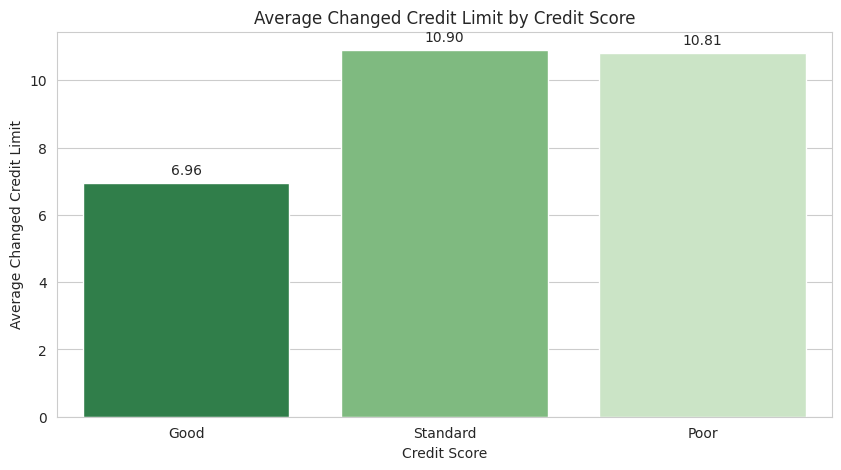

In [ ]:
# Barplot showing the average Changed_Credit_Limit by Credit Score category
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Changed_Credit_Limit', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.title('Average Changed Credit Limit by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Changed Credit Limit')

plt.show()


This could indicate that credit limit changes are more common or significant for customers with lower credit scores.

## 'Credit_Mix'
The **`Credit_Mix`** column represents the variety of credit types a customer uses, such as credit cards, loans, and mortgages. A balanced credit mix can positively affect a customer's credit score by demonstrating their ability to manage different types of credit.

In [ ]:
# Check the column
get_value_count(train, 'Credit_Mix')

Credit_Mix  counts percent
0   Standard   36479  36.48%
1       Good   24337  24.34%
2          _   20195  20.20%
3        Bad   18989  18.99%

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Credit_Mix'].isna().sum())
print('Remaining missing values in Test:', test['Credit_Mix'].isna().sum())
print('dtype: ', train['Credit_Mix'].dtypes)

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  object


In [ ]:
# Replace '_' with 'Unknown'
train['Credit_Mix'].replace('_', 'Unknown', inplace=True) #tarin
test['Credit_Mix'].replace('_', 'Unknown', inplace=True) #test

# Check the column
get_value_count(train, 'Credit_Mix')

Credit_Mix  counts percent
0   Standard   36479  36.48%
1       Good   24337  24.34%
2    Unknown   20195  20.20%
3        Bad   18989  18.99%

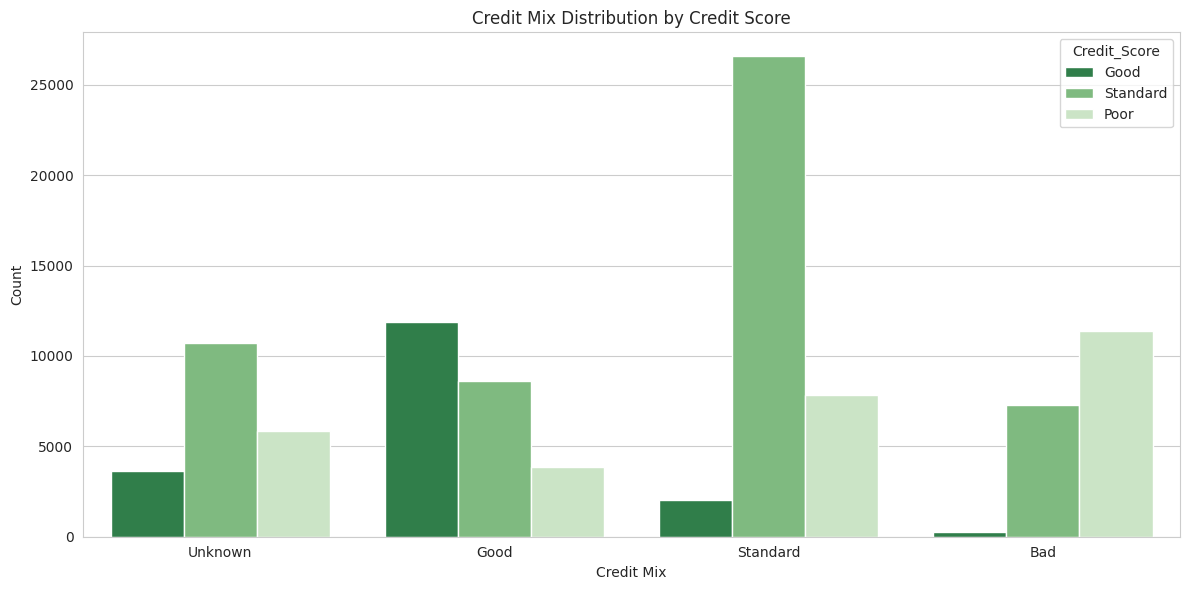

In [ ]:
# Barplot showing the distribution of Credit_Mix by Credit Score category
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Credit_Mix', hue='Credit_Score', data=train, palette='Greens_r')

# Add labels and title
plt.title('Credit Mix Distribution by Credit Score')
plt.xlabel('Credit Mix')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- **Good Credit Mix** is strongly associated with **Good Credit Scores**,
- **Bad Credit Mix** is more common among those with **Poor Credit Scores**.
- **Standard Credit Mix** is most frequent in both **Standard** and **Poor Credit Scores**, showing a balanced but less optimized credit type.
- **Unknown Credit Mix** has no strong correlation with any specific credit score.

## 'Outstanding_Debt'

The **`Outstanding_Debt`** column reflects the total unpaid debt that a customer owes, including balances from loans, credit cards, and other credit lines.
It provides a clear view of the customer’s current financial obligations, which is key for assessing credit risk and determining the customer’s ability to manage more debt.

In [ ]:
# Check the column
get_value_count(train, 'Outstanding_Debt')

Outstanding_Debt  counts percent
0              1360.45      24   0.02%
1               1151.7      23   0.02%
2               460.46      23   0.02%
3              1109.03      23   0.02%
4              1329.59      16   0.02%
...                ...     ...     ...
13173         1619.56_       1   0.00%
13174          297.64_       1   0.00%
13175         1264.42_       1   0.00%
13176         1617.55_       1   0.00%
13177          1324.1_       1   0.00%

[13178 rows x 3 columns]

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Outstanding_Debt'].isna().sum())
print('Remaining missing values in Test:', test['Outstanding_Debt'].isna().sum())
print('dtype: ', train['Outstanding_Debt'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Outstanding_Debt')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  object


{' ', '.', '_ '}

In [ ]:
#TRAIN: Cleaning
# Remove non-numeric characters (keeping only digits and decimals)
train['Outstanding_Debt'] = train['Outstanding_Debt'].apply(lambda x: re.sub(r'[^0-9.-]+', '', str(x)))

# Convert dtype to float and coerce errors to NaN (invalid strings to NaN)
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'], errors='coerce')

In [ ]:
#TEST: Cleaning
#  Remove non-numeric characters (keeping only digits and decimals)
test['Outstanding_Debt'] = test['Outstanding_Debt'].apply(lambda x: re.sub(r'[^0-9.-]+', '', str(x)))

# Convert dtype to float and coerce errors to NaN (invalid strings to NaN)
test['Outstanding_Debt'] = pd.to_numeric(test['Outstanding_Debt'], errors='coerce')

In [ ]:
# Check the list of unique negative values
print('List of unique negative values:', train[train['Outstanding_Debt'] < 0]['Outstanding_Debt'].unique()[:10])
# Print the count of rows with negative values
print('Number of unique negative values:', train[train['Outstanding_Debt'] < 0]['Outstanding_Debt'].count())

List of unique negative values: []
Number of unique negative values: 0


In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Outstanding_Debt'].isna().sum())
print('Remaining missing values in Test:', test['Outstanding_Debt'].isna().sum())
print('dtype: ', train['Outstanding_Debt'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Outstanding_Debt')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  float64


{' ', '.'}

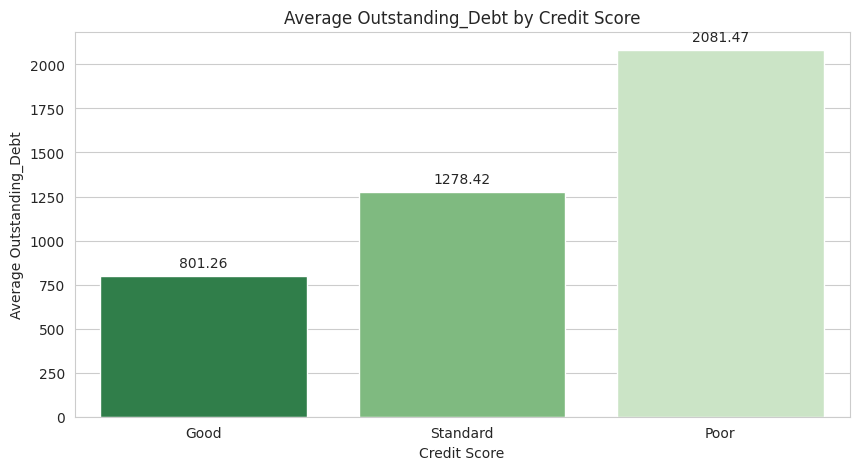

In [ ]:
# Barplot showing the average Outstanding_Debt by Credit Score category
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Outstanding_Debt', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.title('Average Outstanding_Debt by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Outstanding_Debt')

plt.show()


- This suggests a clear relationship between higher outstanding debt and poorer credit scores, indicating that managing debt is a challenge for those with lower credit ratings.

## 'Credit_Utilization_Ratio'

The **`Credit_Utilization_Ratio`** column represents the ratio of a customer's current outstanding debt to their total available credit.  
It measures how much of the customer’s available credit is being used, typically expressed as a percentage.   


In [ ]:
# Check the column
get_value_count(train, 'Credit_Utilization_Ratio')

Credit_Utilization_Ratio  counts percent
0                        39.301       1   0.00%
1                        38.851       1   0.00%
2                        37.753       1   0.00%
3                        27.495       1   0.00%
4                        36.979       1   0.00%
...                         ...     ...     ...
99995                    24.797       1   0.00%
99996                    31.378       1   0.00%
99997                    28.609       1   0.00%
99998                    31.945       1   0.00%
99999                    26.823       1   0.00%

[100000 rows x 3 columns]

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Credit_Utilization_Ratio'].isna().sum())
print('Remaining missing values in Test:', test['Credit_Utilization_Ratio'].isna().sum())
print('dtype: ', train['Credit_Utilization_Ratio'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Credit_Utilization_Ratio')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  float64


{' ', '.'}

In [ ]:
# Check the list of unique negative values
print('List of unique negative values:', train[train['Credit_Utilization_Ratio'] < 0]['Credit_Utilization_Ratio'].unique()[:10])
# Print the count of rows with negative values
print('Number of unique negative values:', train[train['Credit_Utilization_Ratio'] < 0]['Credit_Utilization_Ratio'].count())

List of unique negative values: []
Number of unique negative values: 0


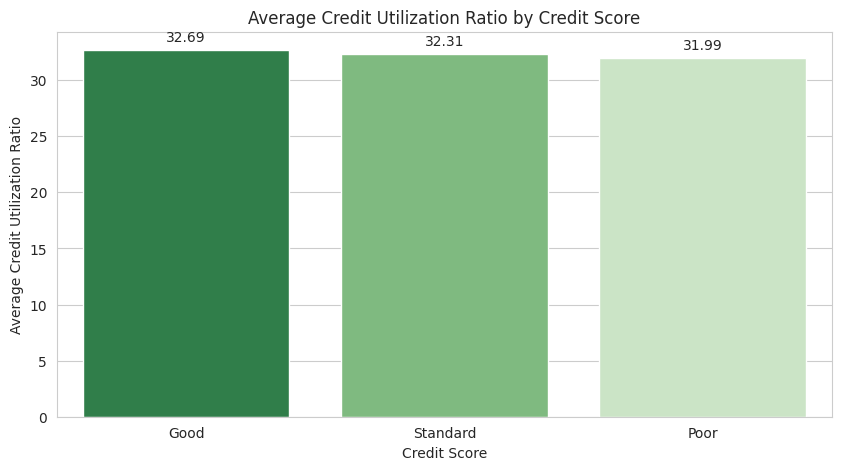

In [ ]:
# Barplot showing the average Credit Utilization Ratio by Credit Score category
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Credit_Utilization_Ratio', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.title('Average Credit Utilization Ratio by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Credit Utilization Ratio')

plt.show()


- This indicates that credit utilization does not significantly vary between these groups.

## 'Payment_Behaviour'

The **`Payment_Behaviour`** column describes the customer’s spending and payment patterns. It indicates whether a customer spends and makes payments in small, medium, or large amounts. This feature helps in understanding how a customer manages their finances in terms of spending and repayments.

In [ ]:
# Check the column
get_value_count(train, 'Payment_Behaviour')

Payment_Behaviour  counts percent
0    Low_spent_Small_value_payments   25513  25.51%
1  High_spent_Medium_value_payments   17540  17.54%
2   Low_spent_Medium_value_payments   13861  13.86%
3   High_spent_Large_value_payments   13721  13.72%
4   High_spent_Small_value_payments   11340  11.34%
5    Low_spent_Large_value_payments   10425  10.42%
6                            !@9#%8    7600   7.60%

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Payment_Behaviour'].isna().sum())
print('Remaining missing values in Test:', test['Payment_Behaviour'].isna().sum())
print('dtype: ', train['Payment_Behaviour'].dtypes)

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  object


In [ ]:
# Replace unusual values in 'Payment_Behaviour' with NaN
train['Payment_Behaviour'].replace('!@9#%8', np.nan, inplace=True)
test['Payment_Behaviour'].replace('!@9#%8', np.nan, inplace=True)

In [ ]:
# Check missing values after replacing !@9#%8 with NaN
print('Remaining missing values in Train:', train['Payment_Behaviour'].isna().sum())
print('Remaining missing values in Test:', test['Payment_Behaviour'].isna().sum())

Remaining missing values in Train: 7600
Remaining missing values in Test: 3800


In [ ]:
# Handle missing values using groupby and mode, with a fallback to 'Unknown'
train['Payment_Behaviour'] = train.groupby(['Credit_Score', 'Outstanding_Debt', 'Num_of_Loan', 'Annual_Income'])['Payment_Behaviour'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

test['Payment_Behaviour']= test.groupby(['Outstanding_Debt', 'Num_of_Loan', 'Annual_Income'])['Payment_Behaviour'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Payment_Behaviour'].isna().sum())
print('Remaining missing values in Test:', test['Payment_Behaviour'].isna().sum())

Remaining missing values in Train: 0
Remaining missing values in Test: 0


In [ ]:
get_value_count(train, 'Payment_Behaviour')

Payment_Behaviour  counts percent
0    Low_spent_Small_value_payments   27350  27.35%
1  High_spent_Medium_value_payments   19195  19.20%
2   High_spent_Large_value_payments   15336  15.34%
3   Low_spent_Medium_value_payments   14600  14.60%
4   High_spent_Small_value_payments   11991  11.99%
5    Low_spent_Large_value_payments   10952  10.95%
6                           Unknown     576   0.58%

In [ ]:
# Drop rows where 'Payment_Behaviour' column has 'Unknown' values ---> only 576 data points (0.5% of total)
train = train[train['Payment_Behaviour'] != 'Unknown']
test = test[test['Payment_Behaviour'] != 'Unknown']

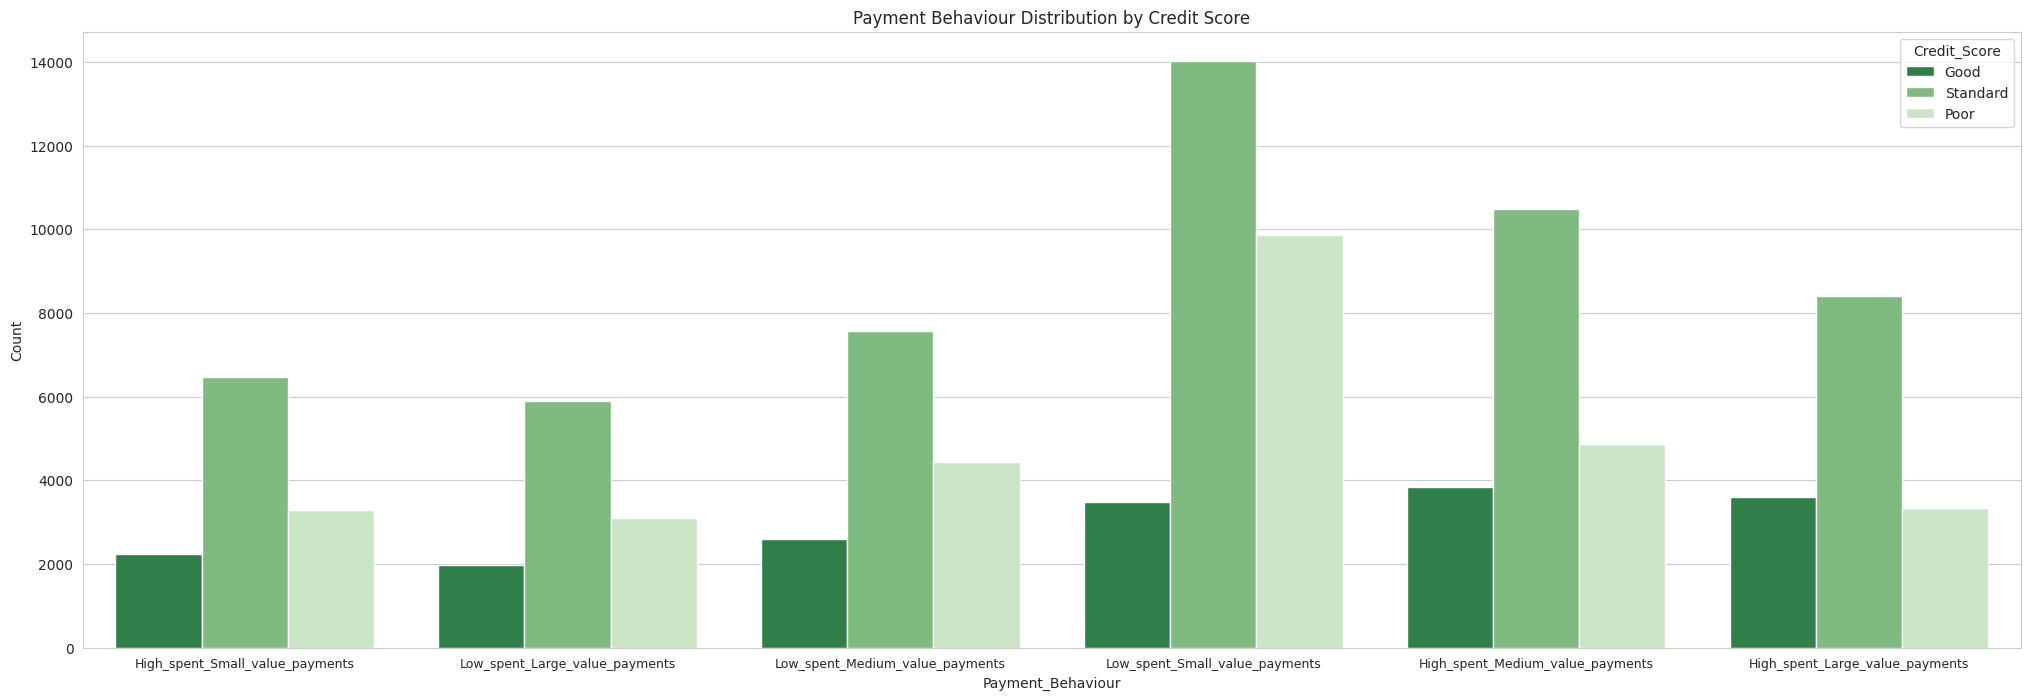

In [ ]:
# Plotting the barplot of Payment_Behaviour by Credit_Score (target feature)
plt.figure(figsize=(25, 8))

# Since Payment_Behaviour is categorical, we use countplot instead of barplot for more accurate visualization
ax = sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=train, palette='Greens_r')

# Add title and labels
plt.title('Payment Behaviour Distribution by Credit Score')
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(fontsize=9)

# Display the plot
plt.show()



This pattern highlights the relationship between **payment behavior** and **credit score**, where higher credit scores are associated with more responsible and consistent payment behavior.   
This feature is crucial for understanding customer financial habits and predicting their creditworthiness, making it an important factor in credit risk models.

## 'Payment_of_Min_Amount'

The **`Payment_of_Min_Amount`** column shows whether a customer has paid the minimum required amount on their credit or loan payments. It contains the following values:

- **`Yes`**: The customer paid the minimum amount.
- **`No`**: The customer did not pay the minimum amount.
- **`NM`**: This likely indicates missing or unreported data regarding whether the customer paid the minimum amount.

In [ ]:
# Check the column
get_value_count(train, 'Payment_of_Min_Amount')

Payment_of_Min_Amount  counts percent
0                   Yes   52024  52.33%
1                    No   35466  35.67%
2                    NM   11934  12.00%

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Payment_of_Min_Amount'].isna().sum())
print('Remaining missing values in Test:', test['Payment_of_Min_Amount'].isna().sum())
print('dtype: ', train['Payment_of_Min_Amount'].dtypes)

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  object


In [ ]:
# Replace unusual values in 'Payment_Behaviour' with NaN
train['Payment_of_Min_Amount'].replace('NM', np.nan, inplace=True)
test['Payment_of_Min_Amount'].replace('NM', np.nan, inplace=True)

In [ ]:
# Check missing values after replacing !@9#%8 with NaN
print('Remaining missing values in Train:', train['Payment_of_Min_Amount'].isna().sum())
print('Remaining missing values in Test:', test['Payment_of_Min_Amount'].isna().sum())

Remaining missing values in Train: 11934
Remaining missing values in Test: 5966


In [ ]:
# Display the first mode of 'Payment_of_Min_Amount' for each group of 'Credit_Score' and 'Payment_Behaviour'
train.groupby(['Credit_Score','Outstanding_Debt','Num_of_Loan','Payment_Behaviour'])['Payment_of_Min_Amount'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

Credit_Score  Outstanding_Debt  Num_of_Loan  Payment_Behaviour               
Good          0.230             3            High_spent_Large_value_payments      No
                                             High_spent_Medium_value_payments     No
                                             Low_spent_Large_value_payments       No
                                             Low_spent_Medium_value_payments      No
                                             Low_spent_Small_value_payments       No
                                                                                ... 
Standard      4997.050          5            Low_spent_Medium_value_payments     Yes
              4997.100          6            Low_spent_Large_value_payments      Yes
                                             Low_spent_Small_value_payments      Yes
              4998.070          8            High_spent_Medium_value_payments    Yes
                                             High_spent_Small_value_payments     Yes
Name: Payment_of_Min_Amount, Length: 59785, dtype: object

In [ ]:
# Filling missing values using groupby and mode, with a fallback to 'Unknown'
train['Payment_of_Min_Amount'] = train.groupby(['Credit_Score','Outstanding_Debt','Num_of_Loan','Payment_Behaviour'])['Payment_of_Min_Amount'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

test['Payment_of_Min_Amount']= test.groupby(['Outstanding_Debt','Num_of_Loan','Payment_Behaviour'])['Payment_of_Min_Amount'].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'Unknown'))

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Payment_of_Min_Amount'].isna().sum())
print('Remaining missing values in Test:', test['Payment_of_Min_Amount'].isna().sum())

Remaining missing values in Train: 0
Remaining missing values in Test: 0


In [ ]:
get_value_count(train, 'Payment_of_Min_Amount')

Payment_of_Min_Amount  counts percent
0                   Yes   56272  56.60%
1                    No   38241  38.46%
2               Unknown    4911   4.94%

In [ ]:
# Drop rows where 'Payment_of_Min_Amount' column has 'Unknown' values--> only 4% of total data
train = train[train['Payment_of_Min_Amount'] != 'Unknown']
test = test[test['Payment_of_Min_Amount'] != 'Unknown']

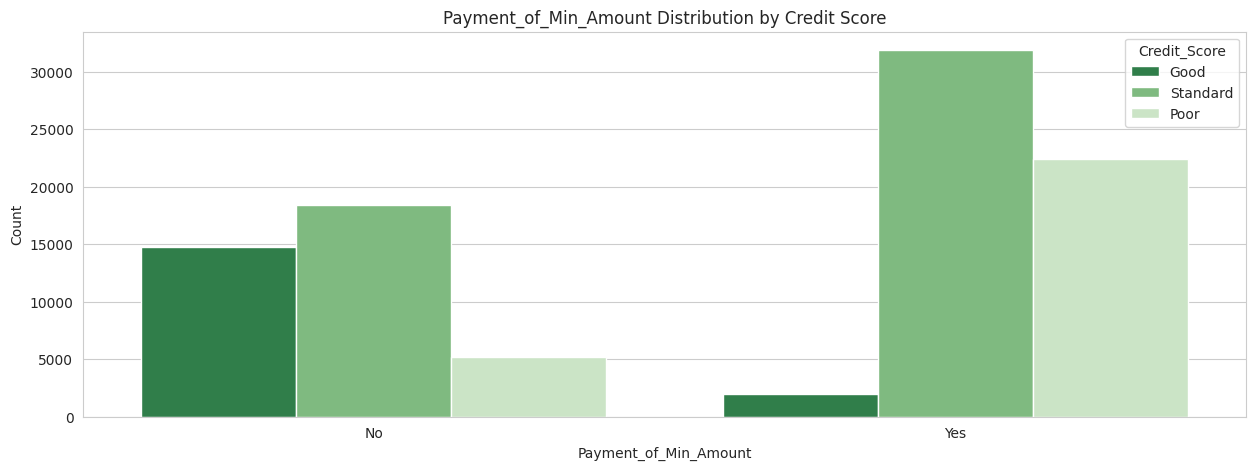

In [ ]:
# Plotting the barplot of Payment_of_Min_Amount by Credit_Score (target feature)
plt.figure(figsize=(15, 5))

# Since Payment_Behaviour is categorical, we use countplot instead of barplot for more accurate visualization
ax = sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=train, palette='Greens_r')

# Add title and labels
plt.title('Payment_of_Min_Amount Distribution by Credit Score')
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.show()

- Customers with **standard** and **poor credit scores** are more likely to make the minimum payment (**'Yes'**), while those with **good credit scores** are more evenly split between making and not making the minimum payment.
- The **'Unknown'** category is minimal across all credit scores, indicating most customers have clear payment behaviors.    
This suggests that making the minimum payment is more common among customers with lower credit scores.

## 'Total_EMI_per_month'

The **`Total_EMI_per_month`** column shows how much a customer pays in monthly loan installments, including both principal and interest.

In [ ]:
# Check the column
get_value_count(train, 'Total_EMI_per_month')

Total_EMI_per_month  counts percent
0                    0.000   10052  10.64%
1                  113.146       8   0.01%
2                  112.657       8   0.01%
3                   64.441       8   0.01%
4                   43.090       8   0.01%
...                    ...     ...     ...
14785            80357.000       1   0.00%
14786            33738.000       1   0.00%
14787            37602.000       1   0.00%
14788            62073.000       1   0.00%
14789            31551.000       1   0.00%

[14790 rows x 3 columns]

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Total_EMI_per_month'].isna().sum())
print('Remaining missing values in Test:', test['Total_EMI_per_month'].isna().sum())
print('dtype: ', train['Total_EMI_per_month'].dtypes)

# Check the unusual-non-numeric values
find_non_numeric_values(train, 'Total_EMI_per_month')

Remaining missing values in Train: 0
Remaining missing values in Test: 0
dtype:  float64


{' ', '.'}

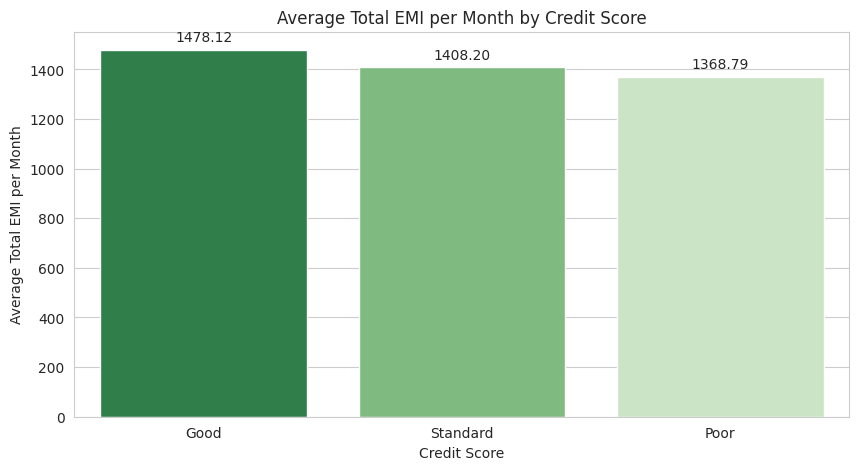

In [ ]:
# Barplot showing the average Total EMI per Month by Credit Score category
plt.figure(figsize=(10, 5))
ax = sns.barplot(x='Credit_Score', y='Total_EMI_per_month', data=train, ci=None, palette='Greens_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.title('Average Total EMI per Month by Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Average Total EMI per Month')

plt.show()


- This suggests that higher credit score customers are likely managing larger loans or have more financial commitments, but they handle their debt better, leading to a higher credit score.

## Target: 'Credit_Score'

The **`Credit_Score`** feature categorizes customers into **Good**, **Standard**, and **Poor** based on their creditworthiness. In real-world finance, this helps banks assess risk, approve loans, and set interest rates. Higher credit scores indicate lower risk, leading to better loan terms, while lower scores suggest higher risk.

In [ ]:
# Check the column
get_value_count(train, 'Credit_Score')

Credit_Score  counts percent
0     Standard   50262  53.18%
1         Poor   27539  29.14%
2         Good   16712  17.68%

In [ ]:
# Check missing values and dtype
print('Remaining missing values in Train:', train['Credit_Score'].isna().sum())
print('dtype: ', train['Credit_Score'].dtypes)

Remaining missing values in Train: 0
dtype:  object


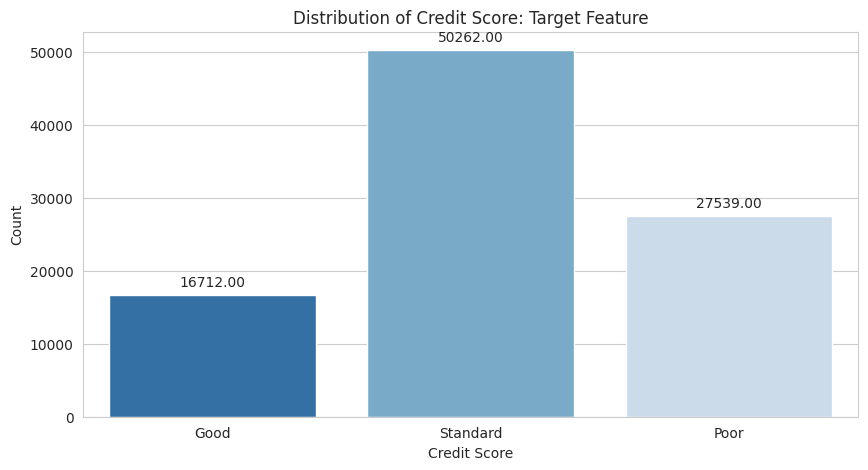

In [ ]:
# Distribution of target feature: Credit_Score
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='Credit_Score', data=train, palette='Blues_r')

# Add values on top of the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 9), textcoords='offset points')

plt.title('Distribution of Credit Score: Target Feature')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.show()

- Majority of customers fall into the **Standard** credit score category, with **53,174** records.
- The **Poor** credit score group is the next largest, with **28,998** records, while the **Good** credit score category has the smallest count at **17,828**.
- This distribution indicates that most customers have an average credit score, and there are fewer customers with excellent credit scores in this dataset.

**Imbalanced Data Distribution:**

The **Credit_Score** target feature is imbalanced, with many more examples in the **Standard** category than in the **Good** and **Poor** categories. This imbalance could lead the model to focus too much on the majority class and make less accurate predictions for the minority classes.
- To deal with this, techniques like **SMOTE** can be used to generate more samples for the smaller classes, balancing the data.


## Dropping Unnecessary Features


- `ID`,
- `Customer_ID`,
- `Name`,
- `SSN`
- `Month`


In [ ]:
# List of columns to drop
columns_to_drop = ['ID', 'Customer_ID', 'Name', 'SSN', 'Month']

# Dropping the columns in both train and test datasets
train.drop(columns=columns_to_drop, inplace=True)
test.drop(columns=columns_to_drop, inplace=True)

print('Dropped Features: 1.ID, 2.Customer_ID, 3.Name, 4.SSN, 5.Month.')

Dropped Features: 1.ID, 2.Customer_ID, 3.Name, 4.SSN, 5.Month.


## Outliers

In [ ]:
train.describe(include='number').T

count       mean         std      min       25%  \
Age                      94513.000     34.343       9.786   18.000    26.000   
Annual_Income            94513.000 168536.136 1386456.264 7005.930 19379.710   
Monthly_Inhand_Salary    94513.000   5664.906   44994.056  303.645  1621.118   
Num_Bank_Accounts        94513.000     17.124     117.652    0.000     3.000   
Num_Credit_Card          94513.000     22.576     129.431    0.000     4.000   
Interest_Rate            94513.000     72.293     466.108    1.000     8.000   
Num_of_Loan              94513.000      9.716      56.183    0.000     2.000   
Delay_from_due_date      94513.000     21.093      14.807    0.000    10.000   
Num_of_Delayed_Payment   94513.000     31.104     219.451    0.000     9.000   
Changed_Credit_Limit     94513.000     10.186       6.878   -6.490     4.980   
Num_Credit_Inquiries     94513.000     27.969     192.267    0.000     3.000   
Outstanding_Debt         94513.000   1425.042    1155.306    0.230   565.340   
Credit_Utilization_Ratio 94513.000     32.291       5.116   20.000    28.061   
Credit_History_Age       94513.000    221.124      95.161    1.000   154.000   
Total_EMI_per_month      94513.000   1409.080    8323.330    0.000    30.174   
Amount_invested_monthly  94513.000    637.794    2000.177    0.000    77.061   
Monthly_Balance          94513.000    402.432     212.956    0.008   270.690   
Credit-Builder Loan      94513.000      0.318       0.466    0.000     0.000   
Personal Loan            94513.000      0.311       0.463    0.000     0.000   
Debt Consolidation Loan  94513.000      0.311       0.463    0.000     0.000   
Student Loan             94513.000      0.310       0.463    0.000     0.000   
Payday Loan              94513.000      0.319       0.466    0.000     0.000   
Mortgage Loan            94513.000      0.314       0.464    0.000     0.000   
Auto Loan                94513.000      0.306       0.461    0.000     0.000   
Home Equity Loan         94513.000      0.314       0.464    0.000     0.000   

                               50%       75%          max  
Age                         34.000    42.000       56.000  
Annual_Income            37353.580 72572.460 24198062.000  
Monthly_Inhand_Salary     3085.853  5957.715  1990379.583  
Num_Bank_Accounts            6.000     7.000     1798.000  
Num_Credit_Card              5.000     7.000     1499.000  
Interest_Rate               13.000    20.000     5797.000  
Num_of_Loan                  3.000     6.000     1496.000  
Delay_from_due_date         18.000    28.000       67.000  
Num_of_Delayed_Payment      15.000    19.000     4397.000  
Changed_Credit_Limit         9.270    14.700       36.970  
Num_Credit_Inquiries         6.000     9.000     2597.000  
Outstanding_Debt          1163.470  1945.030     4998.070  
Credit_Utilization_Ratio    32.314    36.501       50.000  
Credit_History_Age         221.195   292.000      404.000  
Total_EMI_per_month         68.807   160.769    82331.000  
Amount_invested_monthly    142.572   302.729    10000.000  
Monthly_Balance            337.202   468.732     1602.041  
Credit-Builder Loan          0.000     1.000        1.000  
Personal Loan                0.000     1.000        1.000  
Debt Consolidation Loan      0.000     1.000        1.000  
Student Loan                 0.000     1.000        1.000  
Payday Loan                  0.000     1.000        1.000  
Mortgage Loan                0.000     1.000        1.000  
Auto Loan                    0.000     1.000        1.000  
Home Equity Loan             0.000     1.000        1.000

In [ ]:
train.describe(include='object').T

count unique                             top   freq
Occupation             94513     16                         Unknown   6657
Credit_Mix             94513      4                        Standard  34607
Payment_of_Min_Amount  94513      2                             Yes  56272
Payment_Behaviour      94513      6  Low_spent_Small_value_payments  26464
Credit_Score           94513      3                        Standard  50262

In [ ]:
# # Calculate skewness for numeric features
num_cols = df.select_dtypes('number').columns
skew_limit = 1  # define a limit for highly skewed data
skew_cols = df[num_cols].skew().loc[lambda x: (x > skew_limit) | (x < -skew_limit)].sort_values(ascending=False).to_frame('Skew')

skew_cols

Skew
Num_Bank_Accounts     11.219
Num_Credit_Inquiries   9.718
Interest_Rate          9.123
Num_Credit_Card        8.401
Total_EMI_per_month    7.050
Monthly_Inhand_Salary  1.129

In [ ]:
# Handling Outliers
# replace Outliers with median
import numpy as np

# ============= User-Defined-Function for Outliers  ===============

def detect_outliers(df, n, features):
    """
    Detects outliers in the specified features of a DataFrame using the IQR method.
    Args: df (DataFrame), n (int): Number of outliers to identify, features (list): List of features to check.
    Returns: list: A list of indices of the outlier rows.
    """
    outlier_indices = []
    # Iterate over features (columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = 1.5 * IQR
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        # Append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than n outliers
    outlier_indices = list(set([x for x in outlier_indices if outlier_indices.count(x) > n]))

    return outlier_indices

# ============================================================


Numericals = df.select_dtypes(include=np.number).columns.tolist()
for col in Numericals :
       outliers_indecies = detect_outliers(df,0,[col])
       median = df[col].median()
       df[col].iloc[outliers_indecies] = median

**Outliers:**

In the dataset, there are visible outliers in features such as **Annual Income** and **Monthly Inhand Salary**.   


## Save Cleaned DataSets

In [ ]:
# Save the cleaned training data
train.to_csv('clean_train.csv', index=False)

# Save the cleaned test data
test.to_csv('clean_test.csv', index=False)

In [ ]:
# download links
from IPython.display import FileLink, display

# Create and display download links for the cleaned datasets
train_file = FileLink('clean_train.csv', result_html_prefix="Click here to download: ")
test_file = FileLink('clean_test.csv', result_html_prefix="Click here to download: ")

display(train_file)
display(test_file)

/content/clean_train.csv

/content/clean_test.csv

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;"> Data Preprocessing </p>

In [ ]:
# Load the cleaned training data
df_train = pd.read_csv('clean_train.csv')

# Load the cleaned test data
df_test = pd.read_csv('clean_test.csv')

## Encode Categoricals

In [ ]:
# select columns of type 'object'
df_train.select_dtypes(include=['object']).head()

Occupation Credit_Mix Payment_of_Min_Amount  \
0  Scientist    Unknown                    No   
1  Scientist       Good                    No   
2  Scientist       Good                    No   
3  Scientist       Good                    No   
4  Scientist       Good                    No   

                  Payment_Behaviour Credit_Score  
0   High_spent_Small_value_payments         Good  
1    Low_spent_Large_value_payments         Good  
2   Low_spent_Medium_value_payments         Good  
3    Low_spent_Small_value_payments         Good  
4  High_spent_Medium_value_payments         Good

#### Ordinal Encoding

Following columns are suitable for **Ordinal Encoding**:

1. **`Credit_Score`**: Categories like **Good**, **Standard**, and **Poor** have a natural order in terms of creditworthiness, making them ideal for ordinal encoding.
   
2. **`Credit_Mix`**: Categories like **Poor**, **Standard**, and **Good** indicate credit risk levels, making it ideal for ordinal encoding.
   
3. **`Payment_of_Min_Amount`**: This can be encoded as **No = 0**, **Yes = 1** since paying the minimum amount regularly may indicate different levels of financial behavior.


4. **`Payment_Behaviour`**: The column represents a clear progression in terms of financial responsibility. Moving from **Low_spent_Small_value_payments** to **High_spent_Large_value_payments** reflects increasing levels of financial commitment and responsible payment behavior.
    
#### One-Hot Encoding

 **`Occupation`** column not inherently ordinal as categories don’t have a specific rank or order, so it would be better suited for **One-Hot Encoding**.    
    

### Ordinal Encoding the Target Feature: Credit_Score

In [ ]:
df_train['Credit_Score'].value_counts()

Credit_Score
Standard    50262
Poor        27539
Good        16712
Name: count, dtype: int64

In [ ]:
# Define the order of categories for Credit_Score
credit_score_order = [['Poor', 'Standard', 'Good']]  # Ordered from lowest to highest

# Create the OrdinalEncoder for Credit_Score
ordinal_encoder = OrdinalEncoder(categories=credit_score_order, dtype=int)

# Apply ordinal encoding only to the 'Credit_Score' column in df_train
df_train['Credit_Score'] = ordinal_encoder.fit_transform(df_train[['Credit_Score']])

# Check the encoded 'Credit_Score' values
df_train['Credit_Score'].value_counts()

Credit_Score
1    50262
0    27539
2    16712
Name: count, dtype: int64

## Train-Test Split

In [ ]:
#Drop 'Credit_Score' from df_train before applying the column transformer

X = df_train.drop(columns ="Credit_Score")
y = df_train["Credit_Score"]

In [ ]:
seed = 101
X_train, X_val, y_train, y_val = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=seed)

In [ ]:
print('---------------------------------------------')
print("X_train Data rows-columns: ", X_train.shape)
print("y_train Target Feature rosw: ", y_train.shape)
print("X_test Validation Data rows-columns: ", X_val.shape)
print("y_test Validation Data rows-columns: ", y_val.shape)
print('---------------------------------------------')
# Original Test Dataset for Submission
print("Test Dataset rows-columns: ", df_test.shape)
print('---------------------------------------------')

---------------------------------------------
X_train Data rows-columns:  (75610, 29)
y_train Target Feature rosw:  (75610,)
X_test Validation Data rows-columns:  (18903, 29)
y_test Validation Data rows-columns:  (18903,)
---------------------------------------------
Test Dataset rows-columns:  (46609, 29)
---------------------------------------------


### Ordinal and One-Hot Encoding the all Categoricals

In [ ]:
df_train['Credit_Mix'].value_counts()

Credit_Mix
Standard    34607
Good        22859
Unknown     19147
Bad         17900
Name: count, dtype: int64

In [ ]:
df_train['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      26464
High_spent_Medium_value_payments    18353
High_spent_Large_value_payments     14612
Low_spent_Medium_value_payments     13698
High_spent_Small_value_payments     11150
Low_spent_Large_value_payments      10236
Name: count, dtype: int64

In [ ]:
df_train['Payment_of_Min_Amount'].value_counts()

Payment_of_Min_Amount
Yes    56272
No     38241
Name: count, dtype: int64

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# Features to be ordinally encoded
ordinal_features = ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']

# Features to be one-hot encoded
onehot_features = ['Occupation']

# Define the ordinal categories for each feature
credit_mix_order = ['Bad', 'Standard', 'Good', 'Unknown']  # Adjusted based on value counts
payment_min_order = ['No', 'Yes']  # Binary (No < Yes)
payment_behaviour_order = ['Low_spent_Small_value_payments',
                           'Low_spent_Medium_value_payments',
                           'Low_spent_Large_value_payments',
                           'High_spent_Small_value_payments',
                           'High_spent_Medium_value_payments',
                           'High_spent_Large_value_payments']

# Specify the order for these features
ordinal_categories = [credit_mix_order, payment_min_order, payment_behaviour_order]

# Define the column transformer with OrdinalEncoder and OneHotEncoder
column_transformed = make_column_transformer(
    (OrdinalEncoder(categories=ordinal_categories, dtype=int, handle_unknown="use_encoded_value", unknown_value=-100), ordinal_features),  # Ordinal encoding
    (OneHotEncoder(handle_unknown="ignore", dtype=int), onehot_features),  # One-hot encoding
    remainder='passthrough',  # Leave other features as is
    verbose_feature_names_out=False)

In [ ]:
# Apply the column transformer to X-train and X_val!

X_train_transformed = column_transformed.fit_transform(X_train) # Train data
X_val_transformed = column_transformed.transform(X_val)  # Validation test data

In [ ]:
# OrdinalEncoder features and codes
ordinal_features = ['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour']
for feature, categories in zip(ordinal_features, ordinal_categories):
    print(f"\nFeature: {feature}")
    for i, category in enumerate(categories):
        print(f"  {category} -> {i}")



Feature: Credit_Mix
  Bad -> 0
  Standard -> 1
  Good -> 2
  Unknown -> 3

Feature: Payment_of_Min_Amount
  No -> 0
  Yes -> 1

Feature: Payment_Behaviour
  Low_spent_Small_value_payments -> 0
  Low_spent_Medium_value_payments -> 1
  Low_spent_Large_value_payments -> 2
  High_spent_Small_value_payments -> 3
  High_spent_Medium_value_payments -> 4
  High_spent_Large_value_payments -> 5


In [ ]:
features = column_transformed.get_feature_names_out()
features

array(['Credit_Mix', 'Payment_of_Min_Amount', 'Payment_Behaviour',
       'Occupation_Accountant', 'Occupation_Architect',
       'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer',
       'Occupation_Entrepreneur', 'Occupation_Journalist',
       'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic',
       'Occupation_Media_Manager', 'Occupation_Musician',
       'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Unknown',
       'Occupation_Writer', 'Age', 'Annual_Income',
       'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Total_EMI_per_month', 'Amount_invested_monthly',
       'Monthly_Balance', 'Credit-Builder Loan', 'Personal Loan',
       'Debt Consolidation Loan', 'Student Loan', 'Payday Loan'

In [ ]:
# Reassign the transformed features to X train data
X_train = pd.DataFrame(X_train_transformed, columns=features, index=X_train.index)
X_train.head()

Credit_Mix  Payment_of_Min_Amount  Payment_Behaviour  \
88708       0.000                  1.000              2.000   
72254       1.000                  0.000              2.000   
42173       1.000                  1.000              0.000   
60665       0.000                  1.000              2.000   
17746       2.000                  0.000              3.000   

       Occupation_Accountant  Occupation_Architect  Occupation_Developer  \
88708                  0.000                 0.000                 0.000   
72254                  0.000                 0.000                 0.000   
42173                  0.000                 0.000                 0.000   
60665                  0.000                 0.000                 0.000   
17746                  1.000                 0.000                 0.000   

       Occupation_Doctor  Occupation_Engineer  Occupation_Entrepreneur  \
88708              0.000                0.000                    0.000   
72254              0.000                0.000                    0.000   
42173              0.000                1.000                    0.000   
60665              0.000                0.000                    1.000   
17746              0.000                0.000                    0.000   

       Occupation_Journalist  ...  Amount_invested_monthly  Monthly_Balance  \
88708                  0.000  ...                  230.671          297.538   
72254                  1.000  ...                  258.380          260.575   
42173                  0.000  ...                  307.965          220.356   
60665                  0.000  ...                  631.316            0.636   
17746                  0.000  ...                  298.584          211.665   

       Credit-Builder Loan  Personal Loan  Debt Consolidation Loan  \
88708                0.000          0.000                    1.000   
72254                0.000          1.000                    0.000   
42173                0.000          0.000                    0.000   
60665                1.000          1.000                    0.000   
17746                0.000          1.000                    0.000   

       Student Loan  Payday Loan  Mortgage Loan  Auto Loan  Home Equity Loan  
88708         0.000        0.000          0.000      0.000             0.000  
72254         0.000        0.000          0.000      0.000             0.000  
42173         0.000        1.000          1.000      0.000             0.000  
60665         0.000        1.000          0.000      0.000             1.000  
17746         0.000        1.000          0.000      0.000             0.000  

[5 rows x 44 columns]

In [ ]:
# Reassign the transformed features to Validation X_test
X_val = pd.DataFrame(X_val_transformed, columns=features, index=X_val.index)
X_val.head()

Credit_Mix  Payment_of_Min_Amount  Payment_Behaviour  \
29108       0.000                  1.000              2.000   
73621       2.000                  0.000              5.000   
25814       2.000                  0.000              2.000   
59837       3.000                  0.000              0.000   
87303       1.000                  0.000              0.000   

       Occupation_Accountant  Occupation_Architect  Occupation_Developer  \
29108                  0.000                 0.000                 0.000   
73621                  0.000                 0.000                 0.000   
25814                  0.000                 0.000                 0.000   
59837                  0.000                 0.000                 0.000   
87303                  0.000                 0.000                 0.000   

       Occupation_Doctor  Occupation_Engineer  Occupation_Entrepreneur  \
29108              0.000                0.000                    0.000   
73621              0.000                1.000                    0.000   
25814              1.000                0.000                    0.000   
59837              0.000                0.000                    0.000   
87303              0.000                0.000                    0.000   

       Occupation_Journalist  ...  Amount_invested_monthly  Monthly_Balance  \
29108                  0.000  ...                  122.143          305.199   
73621                  0.000  ...                   53.814          620.907   
25814                  0.000  ...                  430.854          965.358   
59837                  0.000  ...                   66.484          294.346   
87303                  0.000  ...                  637.413          344.659   

       Credit-Builder Loan  Personal Loan  Debt Consolidation Loan  \
29108                1.000          0.000                    0.000   
73621                1.000          0.000                    1.000   
25814                0.000          0.000                    0.000   
59837                0.000          0.000                    1.000   
87303                0.000          1.000                    0.000   

       Student Loan  Payday Loan  Mortgage Loan  Auto Loan  Home Equity Loan  
29108         0.000        0.000          1.000      0.000             1.000  
73621         0.000        1.000          0.000      1.000             0.000  
25814         0.000        0.000          1.000      0.000             0.000  
59837         0.000        0.000          1.000      0.000             1.000  
87303         1.000        0.000          0.000      0.000             0.000  

[5 rows x 44 columns]

## Scale: MinMaxScaler

In [ ]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on X_train and transform both X_train and X_val
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Convert scaled arrays back to DataFrame
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val = pd.DataFrame(X_val_scaled, columns=X_val.columns)

X_train.head(3)

Credit_Mix  Payment_of_Min_Amount  Payment_Behaviour  \
0       0.000                  1.000              0.400   
1       0.333                  0.000              0.400   
2       0.333                  1.000              0.000   

   Occupation_Accountant  Occupation_Architect  Occupation_Developer  \
0                  0.000                 0.000                 0.000   
1                  0.000                 0.000                 0.000   
2                  0.000                 0.000                 0.000   

   Occupation_Doctor  Occupation_Engineer  Occupation_Entrepreneur  \
0              0.000                0.000                    0.000   
1              0.000                0.000                    0.000   
2              0.000                1.000                    0.000   

   Occupation_Journalist  ...  Amount_invested_monthly  Monthly_Balance  \
0                  0.000  ...                    0.023            0.186   
1                  1.000  ...                    0.026            0.163   
2                  0.000  ...                    0.031            0.138   

   Credit-Builder Loan  Personal Loan  Debt Consolidation Loan  Student Loan  \
0                0.000          0.000                    1.000         0.000   
1                0.000          1.000                    0.000         0.000   
2                0.000          0.000                    0.000         0.000   

   Payday Loan  Mortgage Loan  Auto Loan  Home Equity Loan  
0        0.000          0.000      0.000             0.000  
1        0.000          0.000      0.000             0.000  
2        1.000          1.000      0.000             0.000  

[3 rows x 44 columns]

## SMOTE for Imbalanced Data

**SMOTE** (Synthetic Minority Over-sampling Technique) is a technique used to address class imbalance by generating synthetic examples for the minority class. It should only be applied to the **training set**, as it creates new synthetic data that should not be used in the **validation** or **test sets**. Using SMOTE on these sets would interfere with the evaluation of the model's performance on real, unseen data.

In [ ]:
y_train.value_counts()

Credit_Score
1    40209
0    22031
2    13370
Name: count, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

# Initialize the SMOTE object
smote = SMOTE(sampling_strategy='auto', random_state=seed)

# Apply SMOTE only to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# X_train_resampled and y_train_resampled are now ready for model training
print("X_train shape :", X_train_smote.shape)
print("y_train shape :", y_train_smote.shape)
print("X_test shape :", X_val.shape)
print("y_test shape :", y_val.shape)

y_train_smote.value_counts()

X_train shape : (120627, 44)
y_train shape : (120627,)
X_test shape : (18903, 44)
y_test shape : (18903,)


Credit_Score
1    40209
2    40209
0    40209
Name: count, dtype: int64

## Correlation

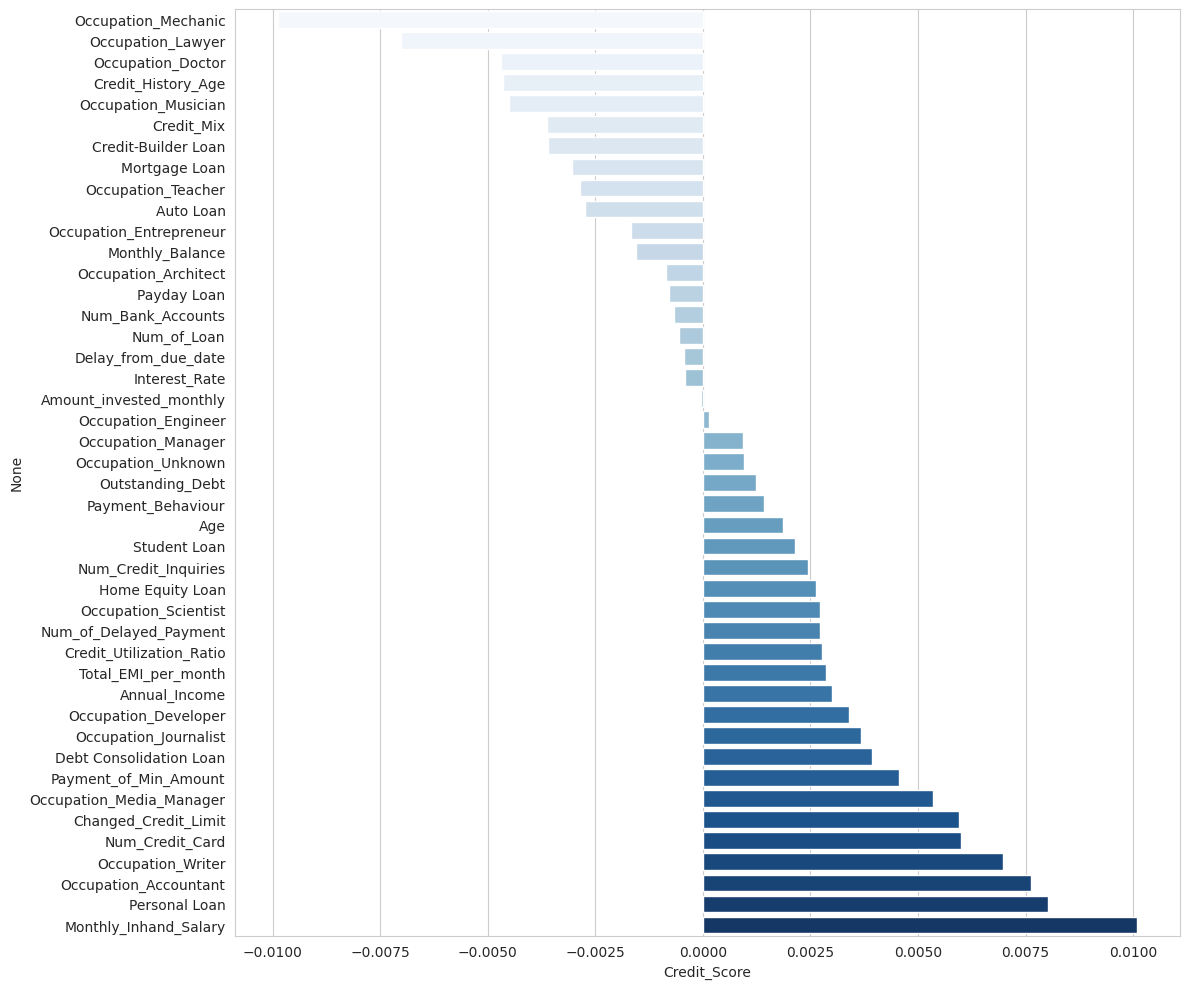

In [ ]:
# Calculate correlation with Credit_Score and sort
corr_by_target = X_train.join(y_train).corr()["Credit_Score"].sort_values()[:-1]

# Create the figure for the horizontal bar plot
plt.figure(figsize=(12, 10))
sns.barplot(x=corr_by_target, y=corr_by_target.index, palette='Blues')
plt.tight_layout()
plt.show()




In summary, financial factors and loan-related features are the most influential in determining credit scores, while some occupations seem to have a minimal or negative impact.

#**MACHINE LEARNING ALGORITHMS**

#Logistic Regression


Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.65      0.62      5508
           1       0.76      0.45      0.56     10053
           2       0.41      0.85      0.56      3342

    accuracy                           0.58     18903
   macro avg       0.59      0.65      0.58     18903
weighted avg       0.65      0.58      0.58     18903



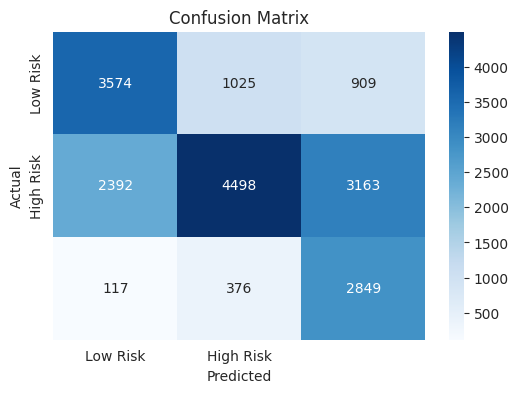

In [ ]:
solver='saga'
from sklearn.linear_model import LogisticRegression

# Initialize the model
log_reg = LogisticRegression(random_state=42, max_iter=1000)

# Fit the model on training data
log_reg.fit(X_train_smote, y_train_smote)

# Predict on validation data
y_pred = log_reg.predict(X_val)

# Evaluate
print("\nClassification Report:\n", classification_report(y_val, y_pred))
cm = confusion_matrix(y_val, y_pred)

# Plotting the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#Random Forest Classifier

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.85      0.81      5508
           1       0.85      0.77      0.81     10053
           2       0.71      0.80      0.76      3342

    accuracy                           0.80     18903
   macro avg       0.78      0.81      0.79     18903
weighted avg       0.81      0.80      0.80     18903



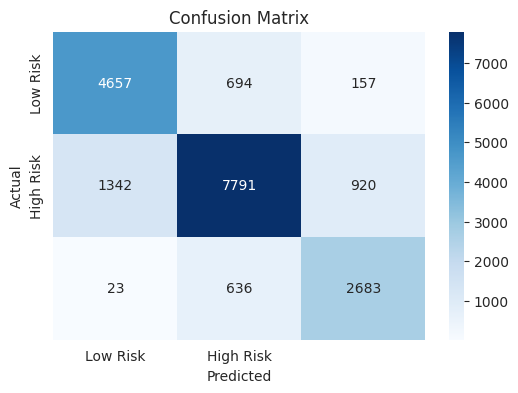

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42, n_jobs=-1)

# Train the model
rf_clf.fit(X_train_smote, y_train_smote)

# Predict on validation set
y_pred = rf_clf.predict(X_val)

# Evaluate the model
print("Classification Report:\n", classification_report(y_val, y_pred))

# Generate the confusion matrix
cm = confusion_matrix(y_val, y_pred)

# Plotting the confusion matrix using Seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


#XG Boost

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      5508
           1       0.80      0.74      0.77     10053
           2       0.61      0.76      0.68      3342

    accuracy                           0.74     18903
   macro avg       0.72      0.74      0.73     18903
weighted avg       0.75      0.74      0.74     18903



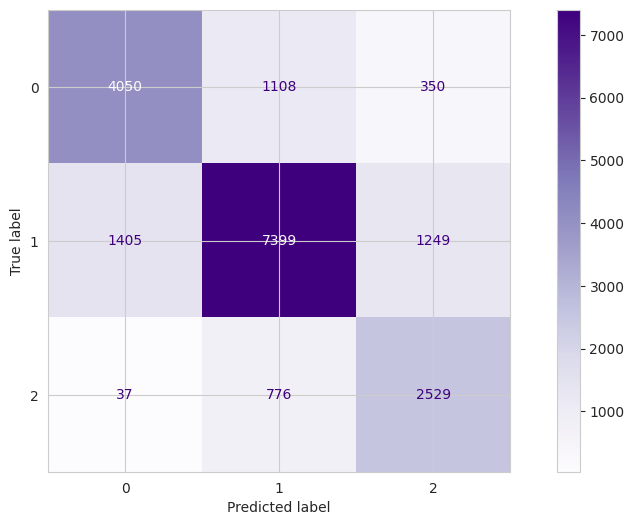

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train XGBoost on SMOTE data
xgb_model = XGBClassifier(
    n_estimators=200,       # number of trees
    learning_rate=0.1,      # step size shrinkage
    max_depth=6,            # maximum depth of trees
    subsample=0.8,          # randomly sample training data
    colsample_bytree=0.8,   # randomly sample features
    random_state=seed,
    n_jobs=-1               # use all CPU cores
)

xgb_model.fit(X_train_smote, y_train_smote)

# Predict on validation set
y_pred_xgb = xgb_model.predict(X_val)

# Evaluate
print(classification_report(y_val, y_pred_xgb))

# Plot confusion matrix
cm_xgb = confusion_matrix(y_val, y_pred_xgb)
ConfusionMatrixDisplay(confusion_matrix=cm_xgb).plot(cmap='Purples')
plt.show()


#LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.200705 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7285
[LightGBM] [Info] Number of data points in the train set: 120627, number of used features: 44
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
              precision    recall  f1-score   support

           0       0.70      0.71      0.71      5508
           1       0.80      0.67      0.73     10053
           2       0.54      0.78      0.64      3342

    accuracy                           0.70     18903
   macro avg       0.68      0.72      0.69     18903
weighted avg       0.72      0.70      0.71     18903



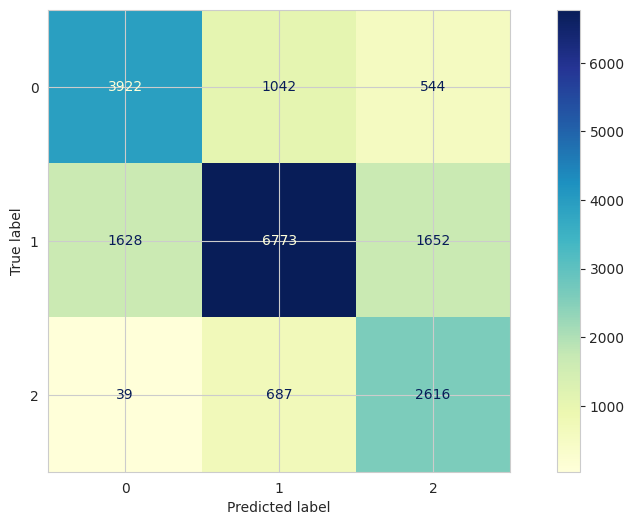

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Train LightGBM on SMOTE data
lgbm_model = LGBMClassifier(
    n_estimators=100,       # number of trees
    learning_rate=0.05,     # learning rate (smaller = better learning)
    max_depth=6,            # max depth of trees
    subsample=0.8,          # % of data used for each tree
    colsample_bytree=0.8,   # % of features used for each tree
    random_state=seed,
    n_jobs=-1,               # use all CPU cores
    num_leaves=31
)

lgbm_model.fit(X_train_smote, y_train_smote)

# Predict on validation set
y_pred_lgbm = lgbm_model.predict(X_val)

# Evaluate
print(classification_report(y_val, y_pred_lgbm))

# Plot confusion matrix
cm_lgbm = confusion_matrix(y_val, y_pred_lgbm)
ConfusionMatrixDisplay(confusion_matrix=cm_lgbm).plot(cmap='YlGnBu')
plt.show()


#K-Nearest  Neighbors

Accuracy on Validation Set: 0.69137173993546

Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.79      0.71      5508
           1       0.82      0.61      0.70     10053
           2       0.55      0.78      0.64      3342

    accuracy                           0.69     18903
   macro avg       0.67      0.72      0.68     18903
weighted avg       0.72      0.69      0.69     18903



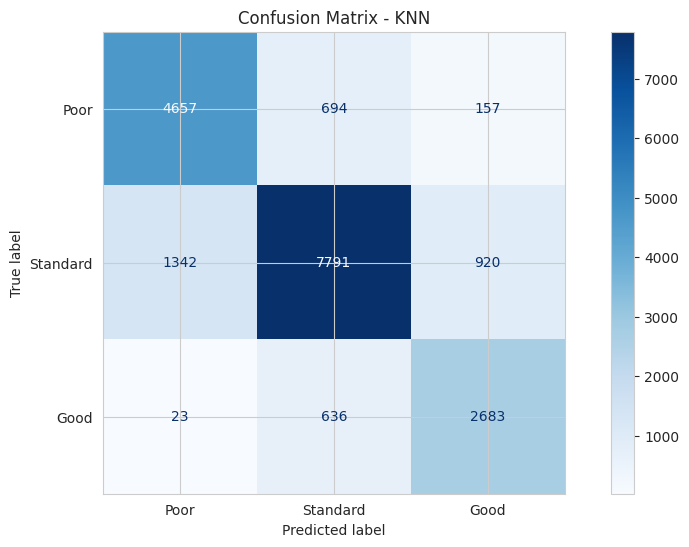

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

# Assuming X_train, y_train, X_val, y_val are already prepared

# Initialize KNN classifier (you can adjust n_neighbors and other parameters)
knn_model = KNeighborsClassifier(n_neighbors=5)

# Fit the model on training data
knn_model.fit(X_train_smote, y_train_smote)

# Make predictions on the validation set
y_val_pred = knn_model.predict(X_val)

# Evaluate model performance
print("Accuracy on Validation Set:", accuracy_score(y_val, y_val_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_val_pred))
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Poor', 'Standard', 'Good'])
cm_display.plot(cmap='Blues')
plt.title('Confusion Matrix - KNN')
plt.show()


In [ ]:
# ########################## User-Defined-Function ###################################

# Function to Evaluate the Model Performans using Classification Confusion_matrix()
# Also does the prediction in the function

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred_probabilities = model.predict(X_train)
    y_train_pred = y_train_pred_probabilities.argmax(axis=1)

    y_pred_probabilities = model.predict(X_test)
    y_pred = y_pred_probabilities.argmax(axis=1)

    print("Test Set:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    print("\nTrain Set:")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
# ########################## User-Defined-Function ###################################
# Plot Feature Importance
def plot_feature_importances(model, X):
    """
    Computes and plots feature importances for the given model using the provided data (X).
    Assumes X is a pandas DataFrame with column names.

    Args:
    model: Trained TensorFlow/Keras model.
    X: Input features data (pandas DataFrame).
    """
    # Check if X is a DataFrame and get feature names
    if isinstance(X, pd.DataFrame):
        feature_names = X.columns.tolist()
    else:
        raise ValueError("X must be a pandas DataFrame with column names.")

    # Convert the input data to a TensorFlow tensor
    X_tensor = tf.convert_to_tensor(X, dtype=tf.float32)

    # Calculate gradients of the output with respect to the input features
    with tf.GradientTape() as tape:
        tape.watch(X_tensor)
        predictions = model(X_tensor)
    gradients = tape.gradient(predictions, X_tensor)

    # Compute feature importances as the absolute sum of gradients
    feature_importances = np.abs(gradients.numpy()).mean(axis=0)

    # Normalize feature importances to percentages
    feature_importances_percent = (feature_importances / feature_importances.sum()) * 100

    # Create a DataFrame to display feature importances
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance (%)': feature_importances_percent.round(2)
    }).sort_values(by='Importance (%)', ascending=False)

    # Plot with feature importance values on top of each bar
    plt.figure(figsize=(18, 8))
    bars = plt.bar(importance_df['Feature'], importance_df['Importance (%)'])

    # Add text labels on top of the bars
    for bar, importance in zip(bars, importance_df['Importance (%)']):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height()+0.1,
                 f'{importance:.2f}%', ha='center', va='bottom',rotation=90,fontsize=12)

    plt.xticks(rotation=90, ha='right',fontsize=12)
    plt.xlabel('Features')
    plt.ylabel('Importance (%)')
    plt.title('Feature Importances')
    plt.tight_layout()
    plt.show()

<a id="setup"></a>
# <p style="background-color: #0e2f52; color:white; font-size:80%; font-family:Verdana; text-align:center; border-radius:15px;padding: 15px;">  ANN Model </p>

An **Artificial Neural Network (ANN)** is a machine learning model that mimics the human brain's structure to learn patterns in data. It consists of layers of interconnected nodes (neurons) that adjust weights to improve predictions.

We use ANN for this dataset because it can capture complex, non-linear relationships between features like credit score, payment history, and income. Its flexibility and ability to learn from large amounts of data make it ideal for achieving high accuracy on this dataset.

#### Required Libraries:

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam, Nadam, AdamW
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.metrics import Recall, Precision
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import SGD

In [ ]:
print('Credi_Score Classes before Smote: ', y_train.value_counts())
print('\nCredi_Score Classes after Smote: ', y_train_smote.value_counts())

Credi_Score Classes before Smote:  Credit_Score
1    40209
0    22031
2    13370
Name: count, dtype: int64

Credi_Score Classes after Smote:  Credit_Score
1    40209
2    40209
0    40209
Name: count, dtype: int64


In [ ]:
# ANN-7 Model with SMOTE:
# Added ReduceLROnPlateau to callbacks

# 1) Optimized Model Architecture:
ann7_smote = Sequential([
    Dense(512, input_dim=X_train_smote.shape[1], activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.25),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(3, activation='softmax')
])

# 2) Compiling the Model:
ann7_smote.compile(optimizer=Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 3) Early stopping
early_stopping = EarlyStopping(monitor='val_accuracy',
                               patience=60,
                               mode="auto",
                               restore_best_weights=True)

# 4) ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.5,  # Learning rate reduced by half if no improvement
                              patience=10,  # Wait 10 epochs before reducing learning rate
                              min_lr=1e-6,  # Minimum learning rate set
                              verbose=1)

# 5) Train the model
history = ann7_smote.fit(
                    x=X_train_smote,
                    y=y_train_smote,
                    validation_data=(X_val, y_val),
                    batch_size=512,
                    epochs=650,
                    verbose=1,
                    callbacks=[early_stopping, reduce_lr])  # Added ReduceLROnPlateau to callbacks


Epoch 1/650
236/236 ━━━━━━━━━━━━━━━━━━━━ 12s 36ms/step - accuracy: 0.5612 - loss: 1.0514 - val_accuracy: 0.6105 - val_loss: 0.8690 - learning_rate: 0.0010
Epoch 2/650
236/236 ━━━━━━━━━━━━━━━━━━━━ 8s 29ms/step - accuracy: 0.6788 - loss: 0.7818 - val_accuracy: 0.6261 - val_loss: 0.8721 - learning_rate: 0.0010
Epoch 3/650
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7033 - loss: 0.7373 - val_accuracy: 0.6428 - val_loss: 0.8152 - learning_rate: 0.0010
Epoch 4/650
236/236 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.7124 - loss: 0.7158 - val_accuracy: 0.6456 - val_loss: 0.8014 - learning_rate: 0.0010
Epoch 5/650
236/236 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.7176 - loss: 0.6991 - val_accuracy: 0.6488 - val_loss: 0.7987 - learning_rate: 0.0010
Epoch 6/650
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7220 - loss: 0.6860 - val_accuracy: 0.6634 - val_loss: 0.7796 - learning_rate: 0.0010
Epoch 7/650
236/236 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step - accuracy: 0.7292

In [ ]:
ann7_smote.evaluate(X_train_smote, y_train_smote)

3770/3770 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8491 - loss: 0.3632


[0.2752509117126465, 0.8941447734832764]

In [ ]:
ann7_smote.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 512)            │        23,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 594,827 (2.27 MB)

 Trainable params: 197,635 (772.01 KB)

 Non-trainable params: 1,920 (7.50 KB)

 Optimizer params: 395,272 (1.51 MB)

In [ ]:
eval_metric(ann7_smote, X_train_smote, y_train_smote, X_val, y_val)

3770/3770 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step
591/591 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
Test Set:
[[4610  695  203]
 [1742 6686 1625]
 [ 104  497 2741]]
              precision    recall  f1-score   support

           0       0.71      0.84      0.77      5508
           1       0.85      0.67      0.75     10053
           2       0.60      0.82      0.69      3342

    accuracy                           0.74     18903
   macro avg       0.72      0.77      0.74     18903
weighted avg       0.77      0.74      0.74     18903


Train Set:
[[38481  1266   462]
 [ 5288 29747  5174]
 [   42   537 39630]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92     40209
           1       0.94      0.74      0.83     40209
           2       0.88      0.99      0.93     40209

    accuracy                           0.89    120627
   macro avg       0.90      0.89      0.89    120627
weighted avg       0.90      0.89      0.89    120627



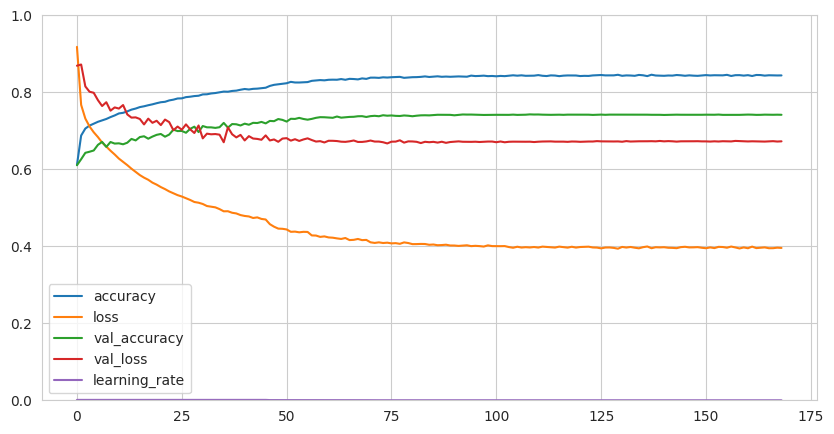

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

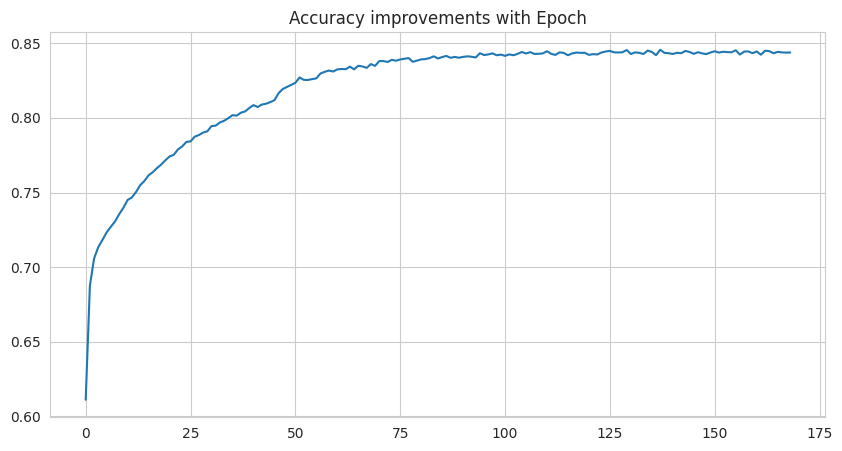

In [ ]:
pd.DataFrame(history.history)["accuracy"].plot(figsize=(10, 5))
plt.title("Accuracy improvements with Epoch")
plt.show()

In [ ]:
# Save the Model

from tensorflow.keras.models import load_model

# Save the model to 'model.h5' file
ann7_smote.save('ann7_smote_model.h5')

# To load the model later for further use
loaded_ann7_smote = load_model('ann7_smote_model.h5')

**ANN-7 Model with SMOTE Summary**:

- **(Dense) layers**: 5 / **Neurons**: 512-256-128-64 / **Dropout**: 30-30-25-20% / **Learning Rate**: 0.001 initially reduced to 1e-6 / **Batch Size**: 512 / **Epochs**: 650 / **Early Stop (val_accuracy)**: 60
- **Accuracy**: 0.89 / **Val_Accuracy**: 0.74 / **Loss**: 0.3632 / **Val_Loss**: 0.6628 / **Train Recall (Class 2)**: 0.99 / **Test Recall (Class 2)**: 0.84


## Final Model

### Preprocessing

In [ ]:
#FINAL MODEL

# Apply the column transformer to df_train and df_test datasets!
# df_train data (No target)
X_transformed = column_transformed.fit_transform(X) # Train data

# df_test data (No target)
df_test_transformed = column_transformed.transform(df_test) # Original Test Data

# Reassign the transformed features to X train data
X = pd.DataFrame(X_transformed, columns=features, index=X.index)

# Reassign the transformed features to Test Data which will be used for Submission Prediction
df_test = pd.DataFrame(df_test_transformed, columns=features, index=df_test.index)

In [ ]:
#SCALE
scaler = MinMaxScaler().fit(X)

# Fit the scaler on X and transform both X and df_test data (no target)
X_scaled = scaler.transform(X)

# Apply the same transformation to df_test for Submission Prediction
df_test_scaled = scaler.transform(df_test)

# Convert scaled arrays back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
df_test_scaled = pd.DataFrame(df_test_scaled, columns=df_test.columns) #for Submission Prediction

In [ ]:
X.head()

Credit_Mix  Payment_of_Min_Amount  Payment_Behaviour  \
0       3.000                  0.000              3.000   
1       2.000                  0.000              2.000   
2       2.000                  0.000              1.000   
3       2.000                  0.000              0.000   
4       2.000                  0.000              4.000   

   Occupation_Accountant  Occupation_Architect  Occupation_Developer  \
0                  0.000                 0.000                 0.000   
1                  0.000                 0.000                 0.000   
2                  0.000                 0.000                 0.000   
3                  0.000                 0.000                 0.000   
4                  0.000                 0.000                 0.000   

   Occupation_Doctor  Occupation_Engineer  Occupation_Entrepreneur  \
0              0.000                0.000                    0.000   
1              0.000                0.000                    0.000   
2              0.000                0.000                    0.000   
3              0.000                0.000                    0.000   
4              0.000                0.000                    0.000   

   Occupation_Journalist  ...  Amount_invested_monthly  Monthly_Balance  \
0                  0.000  ...                   80.415          312.494   
1                  0.000  ...                  118.280          284.629   
2                  0.000  ...                   81.700          331.210   
3                  0.000  ...                  199.458          223.451   
4                  0.000  ...                   41.420          341.489   

   Credit-Builder Loan  Personal Loan  Debt Consolidation Loan  Student Loan  \
0                1.000          1.000                    0.000         0.000   
1                1.000          1.000                    0.000         0.000   
2                1.000          1.000                    0.000         0.000   
3                1.000          1.000                    0.000         0.000   
4                1.000          1.000                    0.000         0.000   

   Payday Loan  Mortgage Loan  Auto Loan  Home Equity Loan  
0        0.000          0.000      1.000             1.000  
1        0.000          0.000      1.000             1.000  
2        0.000          0.000      1.000             1.000  
3        0.000          0.000      1.000             1.000  
4        0.000          0.000      1.000             1.000  

[5 rows x 44 columns]

In [ ]:
df_test.head()

Credit_Mix  Payment_of_Min_Amount  Payment_Behaviour  \
0       2.000                  0.000              0.000   
1       2.000                  0.000              4.000   
2       2.000                  0.000              1.000   
3       2.000                  0.000              4.000   
4       2.000                  0.000              5.000   

   Occupation_Accountant  Occupation_Architect  Occupation_Developer  \
0                  0.000                 0.000                 0.000   
1                  0.000                 0.000                 0.000   
2                  0.000                 0.000                 0.000   
3                  0.000                 0.000                 0.000   
4                  0.000                 0.000                 0.000   

   Occupation_Doctor  Occupation_Engineer  Occupation_Entrepreneur  \
0              0.000                0.000                    0.000   
1              0.000                0.000                    0.000   
2              0.000                0.000                    0.000   
3              0.000                0.000                    0.000   
4              0.000                0.000                    0.000   

   Occupation_Journalist  ...  Amount_invested_monthly  Monthly_Balance  \
0                  0.000  ...                  236.643          312.494   
1                  0.000  ...                   21.465          284.629   
2                  0.000  ...                  148.234          331.210   
3                  0.000  ...                   39.083          223.451   
4                  0.000  ...                   39.684          341.489   

   Credit-Builder Loan  Personal Loan  Debt Consolidation Loan  Student Loan  \
0                1.000          1.000                    0.000         0.000   
1                1.000          1.000                    0.000         0.000   
2                1.000          1.000                    0.000         0.000   
3                1.000          1.000                    0.000         0.000   
4                1.000          0.000                    0.000         0.000   

   Payday Loan  Mortgage Loan  Auto Loan  Home Equity Loan  
0        0.000          0.000      1.000             1.000  
1        0.000          0.000      1.000             1.000  
2        0.000          0.000      1.000             1.000  
3        0.000          0.000      1.000             1.000  
4        0.000          0.000      0.000             0.000  

[5 rows x 44 columns]

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X, y = smote.fit_resample(X,y)

# X_train_resampled and y_train_resampled are now ready for model training
print("X shape :", X.shape)
print("y_train shape :", y.shape)

y.value_counts()

X shape : (150786, 44)
y_train shape : (150786,)


Credit_Score
2    50262
1    50262
0    50262
Name: count, dtype: int64

### Model: ANN-7 with Smote

591/591 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


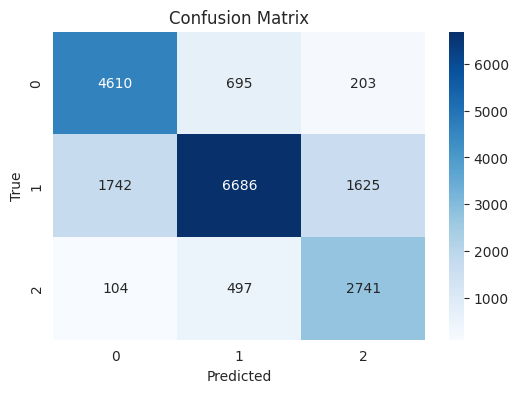

In [ ]:
y_pred = ann7_smote.predict(X_val)
y_pred_classes  = y_pred.argmax(axis=1)

cm = confusion_matrix(y_val, y_pred_classes)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

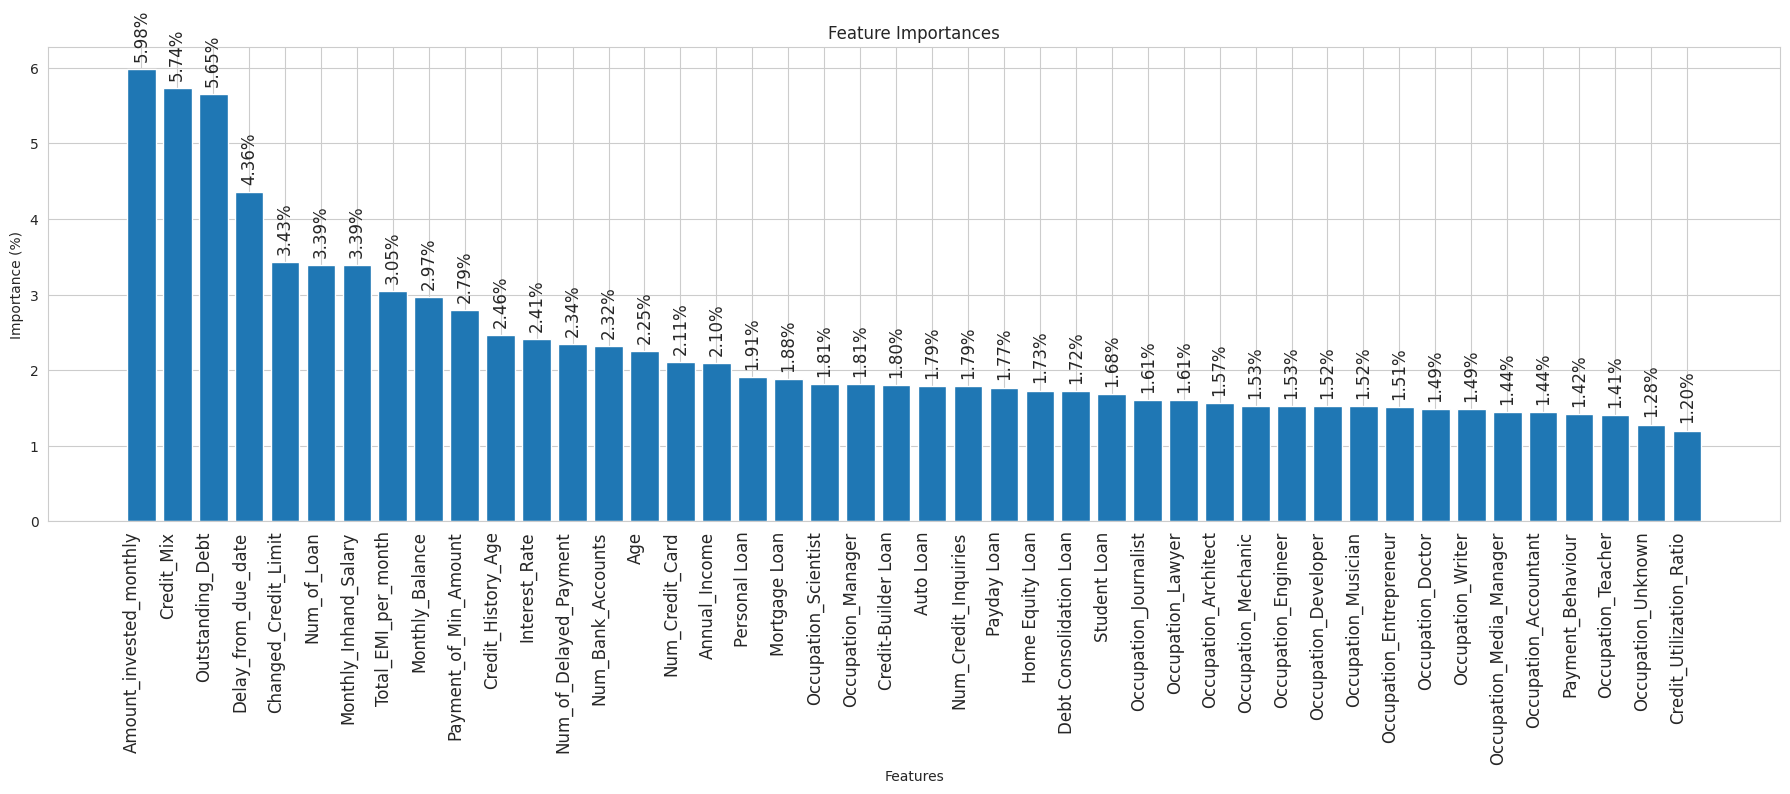

In [ ]:
plot_feature_importances(ann7_smote, X_train)

In [ ]:
# Final Model Architecture:

final_model = Sequential([
                BatchNormalization(),
                Dropout(0.3),
                Dense(256, activation='relu'),
                BatchNormalization(),
                Dropout(0.3),
                Dense(128, activation='relu'),
                BatchNormalization(),
                Dropout(0.25),
                Dense(64, activation='relu'),
                BatchNormalization(),
                Dropout(0.2),
                Dense(3, activation='softmax')
            ])

# 2) Compiling the Model:
final_model.compile(optimizer=Adam(learning_rate=0.001),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 3) Train the model
history = final_model.fit(
                        x=X,
                        y=y,
                        batch_size=512,
                        epochs=500,
                        verbose=1)

Epoch 1/500
295/295 ━━━━━━━━━━━━━━━━━━━━ 13s 24ms/step - accuracy: 0.5393 - loss: 1.0706
Epoch 2/500
295/295 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.6398 - loss: 0.8364
Epoch 3/500
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.6668 - loss: 0.7953
Epoch 4/500
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6756 - loss: 0.7763
Epoch 5/500
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6768 - loss: 0.7698
Epoch 6/500
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6804 - loss: 0.7620
Epoch 7/500
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6856 - loss: 0.7523
Epoch 8/500
295/295 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6838 - loss: 0.7503
Epoch 9/500
295/295 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.6860 - loss: 0.7460
Epoch 10/500
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.6860 - loss: 0.7405
Epoch 11/500
295/295 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.6888 - loss: 0.7399
Epoch 12/500
295/295 ━━━━━━━

In [ ]:
final_model.evaluate(X, y)

4713/4713 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - accuracy: 0.5565 - loss: 1.6363


[1.194529414176941, 0.6689811944961548]

In [ ]:
final_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_4           │ (None, 44)             │           176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 44)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │        11,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,539 (634.92 KB)

 Trainable params: 53,851 (210.36 KB)

 Non-trainable params: 984 (3.84 KB)

 Optimizer params: 107,704 (420.72 KB)

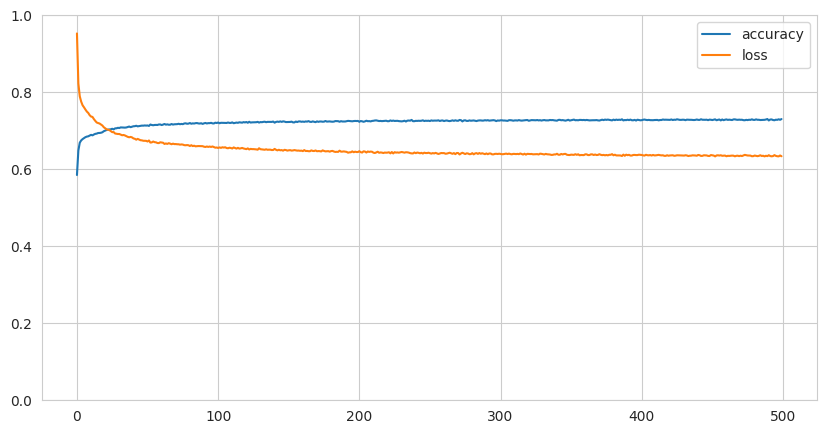

In [ ]:
pd.DataFrame(history.history).plot(figsize=(10,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# Save the Model
from tensorflow.keras.models import load_model

# Save the model
final_model.save('final_model_ANN_creditscore.h5')

# Load the model
ann_final_model = load_model('final_model_ANN_creditscore.h5')

## Prediction with the Test Data

In [ ]:
df_test.head()

Credit_Mix  Payment_of_Min_Amount  Payment_Behaviour  \
0       2.000                  0.000              0.000   
1       2.000                  0.000              4.000   
2       2.000                  0.000              1.000   
3       2.000                  0.000              4.000   
4       2.000                  0.000              5.000   

   Occupation_Accountant  Occupation_Architect  Occupation_Developer  \
0                  0.000                 0.000                 0.000   
1                  0.000                 0.000                 0.000   
2                  0.000                 0.000                 0.000   
3                  0.000                 0.000                 0.000   
4                  0.000                 0.000                 0.000   

   Occupation_Doctor  Occupation_Engineer  Occupation_Entrepreneur  \
0              0.000                0.000                    0.000   
1              0.000                0.000                    0.000   
2              0.000                0.000                    0.000   
3              0.000                0.000                    0.000   
4              0.000                0.000                    0.000   

   Occupation_Journalist  ...  Amount_invested_monthly  Monthly_Balance  \
0                  0.000  ...                  236.643          312.494   
1                  0.000  ...                   21.465          284.629   
2                  0.000  ...                  148.234          331.210   
3                  0.000  ...                   39.083          223.451   
4                  0.000  ...                   39.684          341.489   

   Credit-Builder Loan  Personal Loan  Debt Consolidation Loan  Student Loan  \
0                1.000          1.000                    0.000         0.000   
1                1.000          1.000                    0.000         0.000   
2                1.000          1.000                    0.000         0.000   
3                1.000          1.000                    0.000         0.000   
4                1.000          0.000                    0.000         0.000   

   Payday Loan  Mortgage Loan  Auto Loan  Home Equity Loan  
0        0.000          0.000      1.000             1.000  
1        0.000          0.000      1.000             1.000  
2        0.000          0.000      1.000             1.000  
3        0.000          0.000      1.000             1.000  
4        0.000          0.000      0.000             0.000  

[5 rows x 44 columns]

In [ ]:
# Predictions
probabilities = ann_final_model.predict(df_test)
probabilities

1457/1457 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


array([[0.05751371, 0.00693846, 0.9355478 ],
       [0.03807703, 0.00213481, 0.95978814],
       [0.04880568, 0.00185126, 0.94934297],
       ...,
       [0.6537643 , 0.00724165, 0.3389941 ],
       [0.61206067, 0.01020231, 0.37773702],
       [0.66195804, 0.00130336, 0.33673853]], dtype=float32)

In [ ]:
pred_labels = np.argmax(probabilities, axis=1)
pred_labels

array([2, 2, 2, ..., 0, 0, 0])

In [ ]:
pred_df = pd.DataFrame(pred_labels, columns=['Predicted_Label'])
pred_df

Predicted_Label
0                    2
1                    2
2                    2
3                    2
4                    2
...                ...
46604                0
46605                0
46606                0
46607                0
46608                0

[46609 rows x 1 columns]

In [ ]:
proba_df = pd.DataFrame(probabilities, columns=['Probability_Class_0', 'Probability_Class_1', 'Probability_Class_2'])
proba_df

Probability_Class_0  Probability_Class_1  Probability_Class_2
0                    0.058                0.007                0.936
1                    0.038                0.002                0.960
2                    0.049                0.002                0.949
3                    0.041                0.002                0.957
4                    0.075                0.037                0.888
...                    ...                  ...                  ...
46604                0.878                0.015                0.107
46605                0.957                0.000                0.043
46606                0.654                0.007                0.339
46607                0.612                0.010                0.378
46608                0.662                0.001                0.337

[46609 rows x 3 columns]

In [ ]:
# Concatenate predictions and probabilities DataFrames along the columns axis
pred_proba_df = pd.concat([proba_df, pred_df], axis=1)
pred_proba_df

Probability_Class_0  Probability_Class_1  Probability_Class_2  \
0                    0.058                0.007                0.936   
1                    0.038                0.002                0.960   
2                    0.049                0.002                0.949   
3                    0.041                0.002                0.957   
4                    0.075                0.037                0.888   
...                    ...                  ...                  ...   
46604                0.878                0.015                0.107   
46605                0.957                0.000                0.043   
46606                0.654                0.007                0.339   
46607                0.612                0.010                0.378   
46608                0.662                0.001                0.337   

       Predicted_Label  
0                    2  
1                    2  
2                    2  
3                    2  
4                    2  
...                ...  
46604                0  
46605                0  
46606                0  
46607                0  
46608                0  

[46609 rows x 4 columns]

In [ ]:
pred_proba_df.describe().T

count  mean   std   min   25%   50%   75%   max
Probability_Class_0 46609.000 0.446 0.371 0.012 0.110 0.259 0.888 1.000
Probability_Class_1 46609.000 0.149 0.222 0.000 0.007 0.043 0.167 0.923
Probability_Class_2 46609.000 0.405 0.351 0.000 0.040 0.326 0.778 0.984
Predicted_Label     46609.000 1.032 0.927 0.000 0.000 1.000 2.000 2.000

In [ ]:
pred_proba_df['Predicted_Label'].value_counts()

Predicted_Label
2    20794
0    19298
1     6517
Name: count, dtype: int64

In [ ]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_clf, file)